# Credit EDA Assignment

Problem Statement - I
Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

### Business Understanding
#### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. 
Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. 
#### This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 
### Two types of risks are associated with the bank’s decision:

#### If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#### If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

## The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

#### The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

#### All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

#### 1. Approved: The Company has approved loan Application 

#### 2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

#### 3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

#### 4. Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as 
#### 1. denying the loan, 
#### 2. reducing the amount of loan, 
#### 3. lending (to risky applicants) at a higher interest rate, etc. 

This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the 
#### driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  
The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about 
#### risk analytics - understanding the types of variables and their significance should be enough.

 

Data Understanding
Download the dataset from below.

Dataset
Download
This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

# <span style="color:blue">Step 1 - Importing Necessary Libraries</span>

<span style="color:red">
*MUST RUN CELLS
.</span>

In [1]:
#importing the library
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# <span style="color:blue">Step 2 - Import the Dataset</span>

### Loading The Dataset

<span style="color:red">
*MUST RUN CELLS
.</span>

In [2]:
application_data = pd.read_csv("C:\\Users\\user\\Downloads\\EDA Credit Assignment\\assignment copycopy\\application_data.csv-20231122T084822Z-001\\application_data.csv")

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="color:red">
*MUST RUN CELLS
.</span>

In [3]:
previous_application = pd.read_csv("C:\\Users\\user\\Downloads\\EDA Credit Assignment\\assignment copycopy\\previous_application.csv-20231122T084826Z-001\\previous_application.csv")

In [5]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
file_path = "C:\\Users\\user\\Downloads\\EDA Credit Assignment\\assignment copycopy\\columns_description.csv-20231122T084824Z-001\\columns_description.csv"
columns_description = pd.read_csv(file_path, header = 2,  encoding="latin-1")

In [7]:
columns_description

,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",Unnamed: 4
0,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
1,6,application_data,CODE_GENDER,Gender of the client,NaN
2,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
3,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
4,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
...,...,...,...,...,...
153,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
154,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
155,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
156,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


# <span style="color:blue">Step 3 - Checking the Structure of Dataset

## For Application-Data Table

In [18]:
application_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [19]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
application_data.shape

(307511, 122)

## For Previous-Application 

In [11]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [17]:
previous_application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# <span style="color:blue">Step 4 - Data Quality Checks and Missing Values</span>

## For Application Data

## 4.1 Calculating Percentage of missing values

In [5]:
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

### Showing the Columns with Missing Values > 40 %

In [6]:
percent_app = application_data.isnull().sum()/len(application_data)*100
highnull_columns = application_data.columns[percent_app > 40]
temporary = application_data[highnull_columns]
temporary.isnull().sum()/len(application_data)*100

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [21]:
application_data.shape[1]

122

In [24]:
temporary.shape[1] #contains columns with missing values above 40%. 

49

In [7]:
# column number for cross checking once temporary table columns will be removed
application_data.shape[1] - temporary.shape[1]

73

# <span style="color:green"> Observation
    
    1. application_data.shape[1] - temporary.shape[1] is coming as 73(columns with missing values less than 40%.
    2. There are 49 columns with more than 40% of missing Values.
    
</span>


# 4.2 Removing Columns From Application Data Table
####  since these columns have more than 40% of null value by percentage removing these columns is better otherwise they will mislead.

<span style="color:red">
*MUST RUN CELLS
.</span>

In [4]:
percent_app = application_data.isnull().sum()/len(application_data)*100
application_data = application_data[application_data.columns[percent_app <= 40]]

In [5]:
# cross checking number of columns in new frame from previously genertaed result.
application_data.shape[1]

73

In [10]:
# inspecting the application_data again.

In [18]:
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


### <span style="color:green"> Light Note
    
    Above code is diplaying only top and bottom 30 results. so we will run a loop to indentify columns with missing values.
    
</span>


### Columns with remaining Missing Values

In [11]:
each_column_nullpercent = application_data.isnull().sum()
for key,value in each_column_nullpercent.items():
    if value != 0:
        print(key,",",value/len(application_data)*100)  

AMT_ANNUITY , 0.003902299429939092
AMT_GOODS_PRICE , 0.09040327012692229
NAME_TYPE_SUITE , 0.42014757195677555
OCCUPATION_TYPE , 31.345545362604916
CNT_FAM_MEMBERS , 0.0006503832383231819
EXT_SOURCE_2 , 0.21462646864665005
EXT_SOURCE_3 , 19.825307062186393
OBS_30_CNT_SOCIAL_CIRCLE , 0.3320206431639844
DEF_30_CNT_SOCIAL_CIRCLE , 0.3320206431639844
OBS_60_CNT_SOCIAL_CIRCLE , 0.3320206431639844
DEF_60_CNT_SOCIAL_CIRCLE , 0.3320206431639844
DAYS_LAST_PHONE_CHANGE , 0.00032519161916159093
AMT_REQ_CREDIT_BUREAU_HOUR , 13.501630835970097
AMT_REQ_CREDIT_BUREAU_DAY , 13.501630835970097
AMT_REQ_CREDIT_BUREAU_WEEK , 13.501630835970097
AMT_REQ_CREDIT_BUREAU_MON , 13.501630835970097
AMT_REQ_CREDIT_BUREAU_QRT , 13.501630835970097
AMT_REQ_CREDIT_BUREAU_YEAR , 13.501630835970097


# <span style="color:green"> Observation
1. Resulting table has 73 columns
2. OCCUPATION_TYPE column has highest 31.345545 % of missing values.
3. EXT_SOURCE_3 column has second highest 19.82 % of missing values.
4. last 6 columns has 13.5 % of missing values which are third highest.
5. rest columns has less than 1% of missing values. 
6. some columns do not have any missing values.
7. 55/73 columns contain non-null values. also implies 18 columns still contain null values. 
8. 18 columns has to be worked upon for missing values either using mean/median/mode or according to condition.
    
.</span>

In [ ]:
# to check number of non-null columns

In [12]:
app_null_columns = application_data.loc[:, application_data.isnull().sum() == 0]

In [16]:
app_null_columns.isnull().sum().shape

(55,)

# 4.3 Handling Missing Values

## Handling missing values, especially in a key variable like OCCUPATION_TYPE, is crucial for accurate analysis.
 ### A. Impute Based on Income Bracket and Other Correlates
using the AMT_INCOME_TOTAL column can be a good starting point. The idea would be to analyze the distribution of OCCUPATION_TYPE within different income brackets and then impute the missing values based on the most common occupation in the relevant income bracket. This approach can be refined further by considering other correlates:

Income Bracket: Divide AMT_INCOME_TOTAL into meaningful brackets (e.g., low, middle, high income). Find the most common OCCUPATION_TYPE in each bracket.
Additional Correlates: Look for other variables that might correlate with occupation, such as education level, age, or type of housing. Use a combination of these factors to make a more informed guess about the missing OCCUPATION_TYPE.

 ### B. Cluster Analysis
Perform cluster analysis on your dataset excluding the OCCUPATION_TYPE variable. Once the clusters are identified, analyze the dominant OCCUPATION_TYPE in each cluster and use this to impute missing values.

it's always a good balance between retaining as much useful information as possible and not introducing significant bias into your analysis.

### 4.3.1. OCCUPATION_TYPE column has highest 31.345545 % of missing values.

#### General Inspection

In [18]:
application_data.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [19]:
application_data.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [32]:
application_data.OCCUPATION_TYPE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OCCUPATION_TYPE
Non-Null Count   Dtype 
--------------   ----- 
211120 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


<span style="color:orange">
    *** To see data is normally distributed for OCCUPATION_TYPE column ***
.</span>

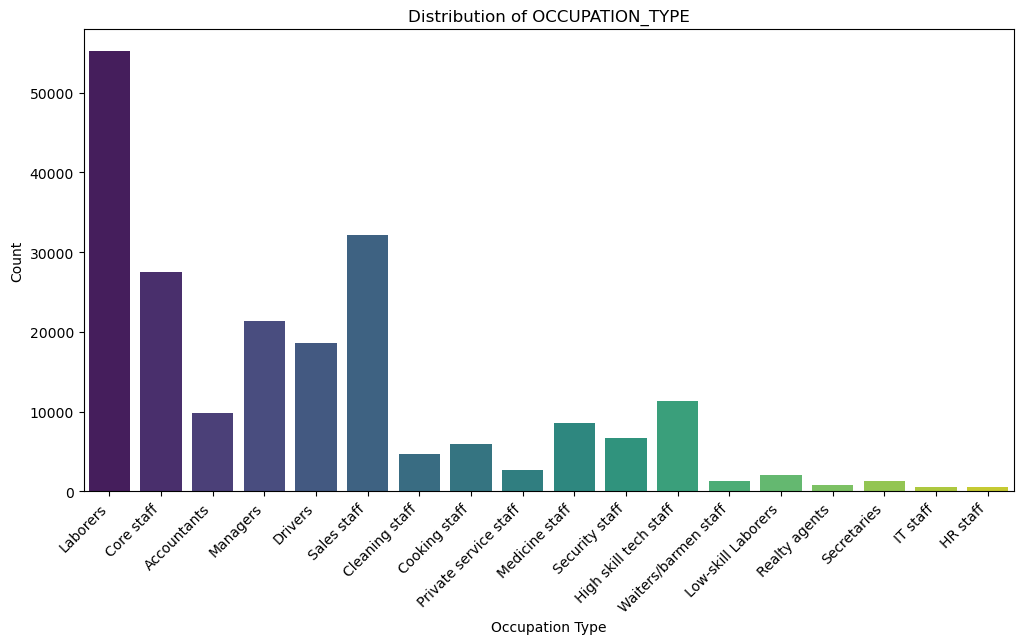

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OCCUPATION_TYPE', data=application_data, palette='viridis')
plt.title('Distribution of OCCUPATION_TYPE')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [ ]:
# to see other columns which can give possible hints for imputation. 

In [37]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


on preliminary survey it looks like AMT_INCOME_TOTAL may have possible relation with OCCUPATION_TYPE. 

In [ ]:
# finding missing values in AMT_INCOME_TOTAL column.

In [43]:
application_data.AMT_INCOME_TOTAL.isnull().sum()

0

In [45]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

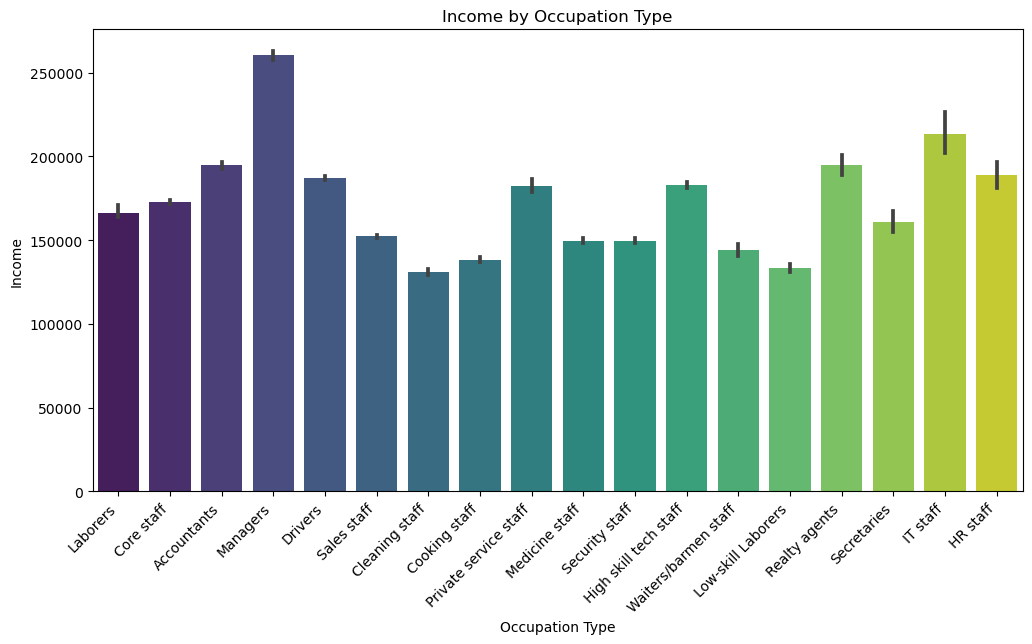

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data=application_data, palette='viridis')
plt.title('Income by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right') 
plt.show()


In [57]:
application_data.OCCUPATION_TYPE.isnull().sum()

96391

In [58]:
len(application_data.OCCUPATION_TYPE)

307511

# <span style="color:green"> Observation
    1. Laborers is the most frequently occuring category.
    2. Data is not normally distributed due to Laborers category.
    3. On preliminary survey it looks like AMT_INCOME_TOTAL may have possible relation with OCCUPATION_TYPE.
    4. There is no null values in AMT_INCOME_TOTAL column. 
    5. 96391 out of 307511 Values are missing in OCCUPATION_TYPE column. 
</span>

<span style="color:red">
  # Replacing the null columns with 'others' to create a new category to make it plotable.
.</span>

<span style="color:red">
*MUST RUN CELLS
.</span>

In [6]:
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna('others')

In [21]:
# to see mean distribution of income and occupation_type column.

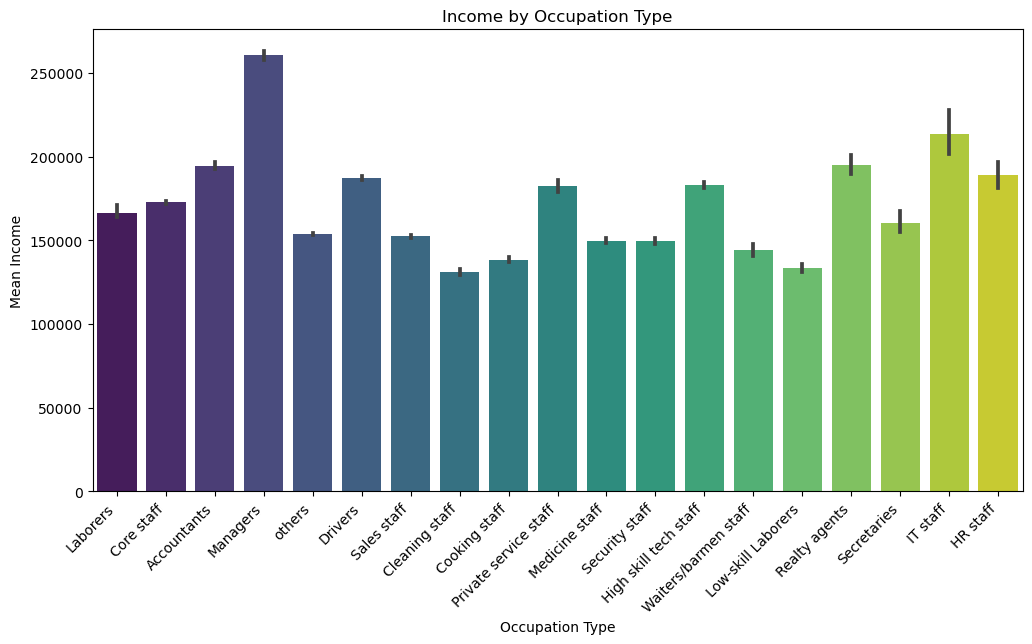

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data=application_data, palette='viridis')
plt.title('Income by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Mean Income')
plt.xticks(rotation=45, ha='right') 
plt.show()

# <span style="color:green"> Observation
1. others category has somewhere around 1.5 lakh mean income.
2. to fill it with any category corresponding to that mean income level lets check the range of income and also standard deviation and median.
3. lowest mean income belongs to cleaning staff.
4. highest mean income belongs to Managers.

In [63]:
# finding the range of others column

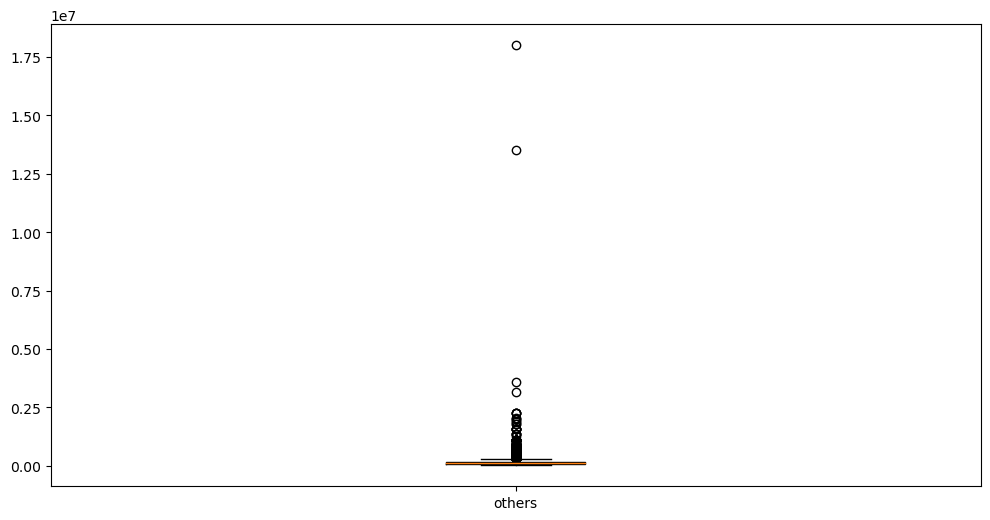

In [95]:
plt.figure(figsize=(12, 6))
data_others = application_data[application_data['OCCUPATION_TYPE'] == 'others']
plt.boxplot(data_others['AMT_INCOME_TOTAL'], labels=['others'])
plt.show()

# <span style="color:green"> Observation
1. to impute values based on AMT_INCOME_TOTAL it would be better to make bins like [0,30000, 44000, 100000, 150000, 210000, and above]
2. based on these bins we have to find the most occuring OCCUPATION_TYPE.
3. based on that parameter we will impute values.


In [23]:
# creating Income Bin as a new column

<span style="color:red">
*MUST RUN CELLS
.</span>

In [7]:
income_bins = [0, 30000, 44000,100000, 150000,210000, float('inf')]
income_labels = ['Low', 'Middle-Low', 'Middle', 'Middle-High', 'High','Very-High']


application_data['Income_Bin'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels, include_lowest=True)

# Display the DataFrame with the new 'Income_Bin' column
print(application_data[['AMT_INCOME_TOTAL', 'Income_Bin', 'OCCUPATION_TYPE']])


        AMT_INCOME_TOTAL   Income_Bin OCCUPATION_TYPE
0               202500.0         High        Laborers
1               270000.0    Very-High      Core staff
2                67500.0       Middle        Laborers
3               135000.0  Middle-High        Laborers
4               121500.0  Middle-High      Core staff
...                  ...          ...             ...
307506          157500.0         High     Sales staff
307507           72000.0       Middle          others
307508          153000.0         High        Managers
307509          171000.0         High        Laborers
307510          157500.0         High        Laborers

[307511 rows x 3 columns]


In [26]:
# finding the most occuring OCCUPATION_TYPE category in each Income-bin while excluding 'others' category.

In [27]:

# Exclude rows where 'OCCUPATION_TYPE' is 'others'
filtered_data = application_data[application_data['OCCUPATION_TYPE'] != 'others']

# Find the most occurring 'OCCUPATION_TYPE' (excluding 'others') within each income bin
most_common_occupation_by_income = filtered_data.groupby('Income_Bin')['OCCUPATION_TYPE'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'others').to_dict()

# Display the result
for income_bin, most_common_occupation in most_common_occupation_by_income.items():
    print(f"Most common 'OCCUPATION_TYPE' in {income_bin}: {most_common_occupation}")


Most common 'OCCUPATION_TYPE' in Low: Cleaning staff
Most common 'OCCUPATION_TYPE' in Middle-Low: Core staff
Most common 'OCCUPATION_TYPE' in Middle: Laborers
Most common 'OCCUPATION_TYPE' in Middle-High: Laborers
Most common 'OCCUPATION_TYPE' in High: Laborers
Most common 'OCCUPATION_TYPE' in Very-High: Managers


### <span style="color:darkmagenta"> Suggestions - 
    1. These are suggested values to impute for different Income_bin column for others in OCCUPATION_TYPE column. 
    2. On closer observation below we found that data is skewed because of Laborers Category in OCCUPATION_TYPE column.
    3. But we are not performing any imputations as mentioned in the Manual.


In [28]:
# countplot to see if Data is normally distributed or not. 

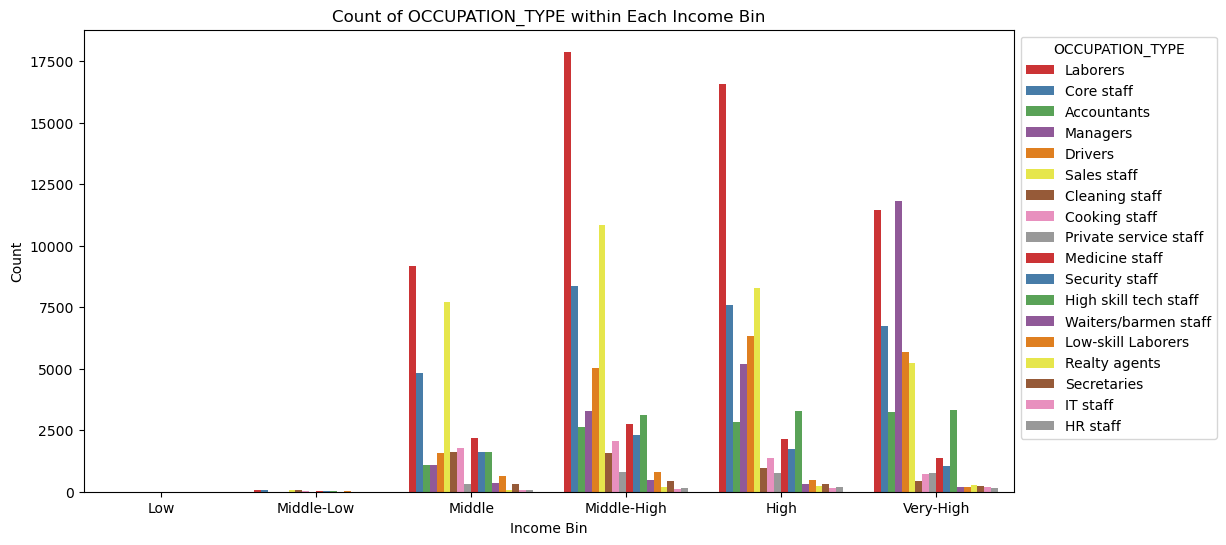

In [41]:
# Exclude rows where 'OCCUPATION_TYPE' is 'others'
filtered_data = application_data[application_data['OCCUPATION_TYPE'] != 'others']

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Bin', hue='OCCUPATION_TYPE',palette='Set1', data=filtered_data)
plt.title('Count of OCCUPATION_TYPE within Each Income Bin')
plt.xlabel('Income Bin')
plt.ylabel('Count')
plt.legend(title='OCCUPATION_TYPE', bbox_to_anchor=(1, 1))
plt.show()

### 4.3.2. EXT_SOURCE_3 column has second highest 19.82 % of missing values.


General Inspecting the table containing null values in EXT_SOURCE_3 column.

In [29]:
application_data[application_data['EXT_SOURCE_3'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very-High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-High
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Very-High
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,High
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,High


In [32]:
application_data['EXT_SOURCE_3'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: EXT_SOURCE_3
Non-Null Count   Dtype  
--------------   -----  
246546 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [33]:
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [34]:
application_data['EXT_SOURCE_3'].median()

0.5352762504724826

In [35]:
application_data['EXT_SOURCE_3'].mean()


0.5108529061799658

### <span style="color:darkmagenta"> Suggestions -
    1.There is not much difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.3. Last 6 columns has 13.5 % of missing values which are third highest.


### 4.3.3.1 AMT_REQ_CREDIT_BUREAU_HOUR

In [36]:
application_data[application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,High
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Very-High
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,High
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,High


In [37]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()

0.0

In [38]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

In [38]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()

0.006402448193930645

In [39]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is not much difference between mean and median and mode.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

 ### 4.3.3.2 AMT_REQ_CREDIT_BUREAU_DAY

In [41]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [40]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean()

0.0070002105326475985

In [41]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()

0.0

In [42]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is not much difference between mean and median and mode.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.3.3 AMT_REQ_CREDIT_BUREAU_WEEK

In [45]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [44]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()

0.0

In [43]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is not much difference between mean and median and mode.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.3.4 AMT_REQ_CREDIT_BUREAU_MON

In [44]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [45]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].median()

0.0

In [46]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is not much difference between mean and median and mode.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.3.5 AMT_REQ_CREDIT_BUREAU_QRT


In [43]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [48]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()

0.0

In [49]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is not much difference between mean and median and mode.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.3.6 AMT_REQ_CREDIT_BUREAU_YEAR

In [42]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [50]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

In [51]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is slight difference between mean and median and mode.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4. Columns with less than 1% of missing values.

AMT_ANNUITY , 0.003902299429939092

AMT_GOODS_PRICE , 0.09040327012692229

NAME_TYPE_SUITE , 0.42014757195677555

CNT_FAM_MEMBERS , 0.0006503832383231819

EXT_SOURCE_2 , 0.21462646864665005

OBS_30_CNT_SOCIAL_CIRCLE , 0.3320206431639844

DEF_30_CNT_SOCIAL_CIRCLE , 0.3320206431639844

OBS_60_CNT_SOCIAL_CIRCLE , 0.3320206431639844

DEF_60_CNT_SOCIAL_CIRCLE , 0.3320206431639844

DAYS_LAST_PHONE_CHANGE , 0.00032519161916159093

### 4.3.4.1 AMT_ANNUITY

In [52]:
application_data[application_data['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,High
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,Middle
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,High
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,High
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0,High
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0,Middle-High
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,Middle
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0,High
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0,High
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0,Very-High


In [53]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [64]:
application_data['AMT_ANNUITY'].median()

24903.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is difference between mean and median and mode.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3. code to be used - 
    application_data['AMT_ANNUITY'] = application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median())
    4.Not performing any imputations as mentioned in the Manual.

### 4.3.4.2 AMT_GOODS_PRICE

In [54]:
application_data[application_data['AMT_GOODS_PRICE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,High
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-High
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Middle
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-High
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Middle-High
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,Middle-High


In [57]:
len(application_data[application_data['AMT_GOODS_PRICE'].isnull()])

278

In [59]:
# checking what is NAME_CONTRACT_TYPE in all the columns

filtered_data = application_data[application_data['AMT_GOODS_PRICE'].isnull()]
value_counts = filtered_data['NAME_CONTRACT_TYPE'].value_counts()

print(value_counts)


Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64


# <span style="color:green"> Observation
    1. all the null values in AMT_GOODS_PRICE column corresponds to 'Revolving loans' category of NAME_CONTRACT_TYPE column.

### <span style="color:darkmagenta"> Suggestions -
    1. Here NaN can be converted to 0, as no goods are purchased. 
    2. code to be used - 
    application_data['AMT_GOODS_PRICE'].fillna(value=0, inplace=True)
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.3 NAME_TYPE_SUITE

In [56]:
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

### <span style="color:darkmagenta"> Suggestions -
    1. Here Missing values can be replaced by Mode(). 
    2. code to be used - 
    application_data['NAME_TYPE_SUITE'] = application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode().iloc[0])
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.4 CNT_FAM_MEMBERS

In [57]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [60]:
application_data['CNT_FAM_MEMBERS'].median()

2.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is slight difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.5 EXT_SOURCE_2

In [58]:
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [61]:
application_data['EXT_SOURCE_2'].median()

0.5659614260608526

### <span style="color:darkmagenta"> Suggestions -
    1.There is slight difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.6 OBS_30_CNT_SOCIAL_CIRCLE

In [59]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [62]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.7 DEF_30_CNT_SOCIAL_CIRCLE

In [60]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [63]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median()

0.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is slight difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.8 OBS_60_CNT_SOCIAL_CIRCLE

In [66]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [67]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()

0.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is slight difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.9 DEF_60_CNT_SOCIAL_CIRCLE

In [62]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [64]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median()

0.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is slight difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.4.10 DAYS_LAST_PHONE_CHANGE

In [63]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [65]:
application_data['DAYS_LAST_PHONE_CHANGE'].median()

-757.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

# Previous_application

In [4]:
# calculating percentage of null values in each row in dataframe in previous application
previous_application.isnull().sum()/len(previous_application)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

# Dropping columns with more than 40 % values.

<span style="color:red">
*MUST RUN CELLS
.</span>

In [8]:
percent = previous_application.isnull().sum()/len(previous_application)*100
previous_application = previous_application[previous_application.columns[percent <= 40]]

In [9]:
# columns with missing values

In [8]:
each_column_nullpercent1 = previous_application.isnull().sum()
for key,value in each_column_nullpercent1.items():
    if value != 0:
        print(key,",",value/len(previous_application)*100)

AMT_ANNUITY , 22.286665062081866
AMT_CREDIT , 5.9872567227912114e-05
AMT_GOODS_PRICE , 23.08177275486854
CNT_PAYMENT , 22.286365699245724
PRODUCT_COMBINATION , 0.02071590826085759


In [ ]:
# we have to correct only these columns. 

so there are 5 columns with null values 
1. 'AMT_ANNUITY',________float    
2. 'AMT_CREDIT',_________float
3. 'AMT_GOODS_PRICE',____float
4. 'CNT_PAYMENT',________float
5. 'PRODUCT_COMBINATION'_object

Correcting THese columns one by one based on their Analysis

### 4.3.A AMT_ANNUITY

In [32]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [75]:
previous_application['AMT_ANNUITY'].median()

11250.0

# <span style="color:green"> Observation
    1. clearly AMT_ANNUITY COLUMN has outliers so it doesn't have normalised distribution. Therefore value cannot be replaced by mean.

### <span style="color:darkmagenta"> Suggestions -
    1.There is difference between mean and median.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.B AMT_CREDIT

In [6]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [77]:
previous_application['AMT_CREDIT'].median()

80541.0

### <span style="color:darkmagenta"> Suggestions -
    1.There is huge difference between mean and standard deviation.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.C AMT_GOODS_PRICE 

In [78]:
previous_application['AMT_GOODS_PRICE'].median()


112320.0

In [79]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is huge difference between mean and standard deviation.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.D CNT_PAYMENT

In [81]:
previous_application['CNT_PAYMENT'].median()

12.0

In [80]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1.There is difference between mean and standard deviation.
    2.Imputations can be done on basis of median which is quite safer option since it has outlier and is numeric column.
    3.Not performing any imputations as mentioned in the Manual.

### 4.3.E PRODUCT_COMBINATION

In [82]:
previous_application['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [11]:
previous_application['PRODUCT_COMBINATION'].mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

### <span style="color:darkmagenta"> Suggestions -
    1. Here Missing values can be replaced by Mode(). 
    2.Not performing any imputations as mentioned in the Manual.

# 4.4 Checking Our Column Details and Correction of Datatype and Standardisation

In [72]:
application_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

To check which values each column contain

In [89]:
pd.set_option('display.max_columns', None)

In [92]:
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very-High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-High
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Middle
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,High
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State se

### <span style="color:blue">Steps to be taken -
1. Inspect the column's datatype and values it contain.
2. read the description table and try to understand what it contains.
3. figuring out what we need in our analysis so that its datatype has to be converted or not.
4. convert datatype. 

# <span style="color:green"> Observation
    1. DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH are integer datatype. and has negeative values. it should be converted into appropriate date type.
    2. DAYS_BIRTH,DAYS_EMPLOYED seems necessary column for analysis at first glance after reading the description manual. 
    3. DAYS_REGISTRATION is float type. it should also be converted to appropriate date type. 
    4. negative sign in above columns indicate no of days already past. so we will convert it into a positive number first.
    5. CNT_FAM_MEMBERS is float, it should be integer. 

## DAYS_BIRTH

In [93]:
application_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Creating a new column name AGE by dividing the days by 365.

<span style="color:red">
*MUST RUN CELLS
.</span>

In [9]:
application_data['AGE'] = -application_data['DAYS_BIRTH'] / 365

In [100]:
application_data['AGE']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: AGE, Length: 307511, dtype: float64

## DAYS_EMPLOYED

# <span style="color:green"> Observation
    1. It contains both positive and negative values.

In [94]:
application_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<span style="color:red">
*MUST RUN CELLS
.</span>

In [10]:
application_data['Years_employed'] = -application_data['DAYS_EMPLOYED'] / 365
application_data['Years_employed'] = application_data['Years_employed'].abs()

In [11]:
application_data['Years_employed'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: Years_employed, dtype: float64

# <span style="color:green"> Observation
    1. Clearly we can see presence of an outlier

 ## CNT_FAM_MEMBERS
 

In [142]:
application_data['CNT_FAM_MEMBERS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [156]:
application_data[application_data['CNT_FAM_MEMBERS'] == 'nan' ].shape[0]

0

In [158]:
application_data['CNT_FAM_MEMBERS'].isnull().sum()

2

# <span style="color:green"> Observation
    1. Clearly we can see presence of an null values as nan

In [143]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [160]:
application_data['CNT_FAM_MEMBERS'].mode()[0]

2.0

In [ ]:
# replacing the nan values to mode values. as this will be required in further analysis

<span style="color:red">
*MUST RUN CELLS
.</span>

In [11]:
application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].fillna(application_data['CNT_FAM_MEMBERS'].mode()[0])

application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype(int)


## AMT_ANNUITY

In [168]:
application_data['AMT_ANNUITY'].isnull().sum()

12

In [169]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [170]:
application_data['AMT_ANNUITY'].median()

24903.0

<span style="color:red">
*MUST RUN CELLS
.</span>

In [12]:
#replacing missing values with median 
application_data['AMT_ANNUITY'] = application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median())

# 4.5 Identifying Handling Outliers

### 4.5.1 Years_employed

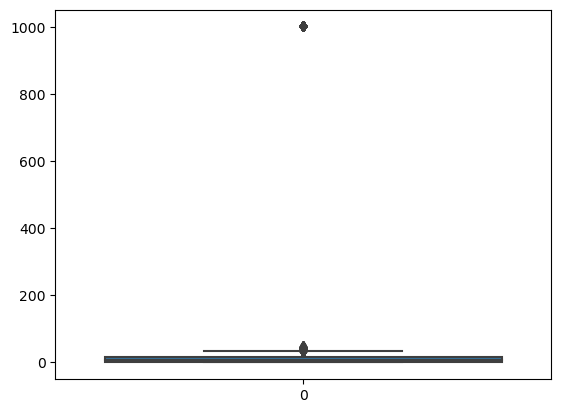

In [115]:
sns.boxplot(application_data['Years_employed'])
plt.show()

# <span style="color:green"> Observation
    1. Clearly we can see presence of an outlier as age cannot be 1000 years.
    

### <span style="color:darkmagenta"> Suggestions -
    1. Outlier can be treated by removing this row altogether.
    2. We are not treating the outlier as suggested in the desciption Manual.

### 4.5.2 TARGET

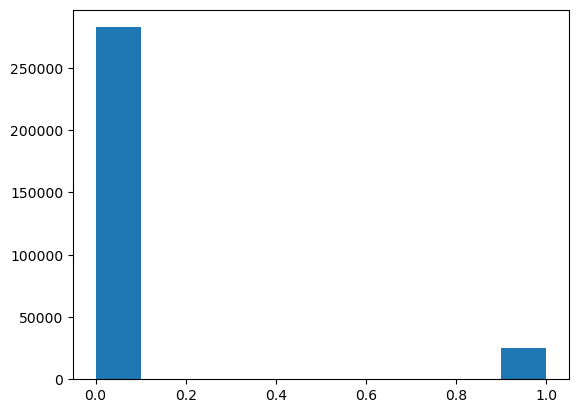

In [121]:
plt.hist(application_data["TARGET"])
plt.show()

In [123]:
application_data["TARGET"].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

# <span style="color:green"> Observation
    1. No Outliers Present.

### 4.5.3 AGE 

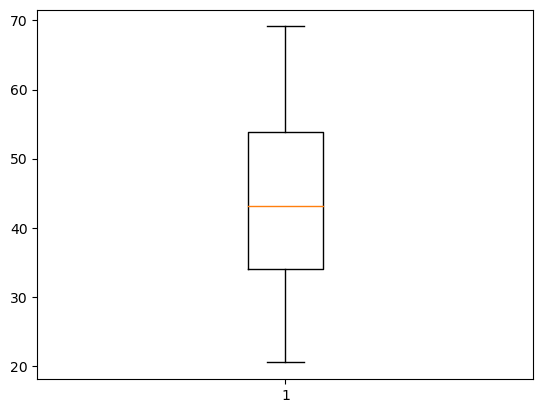

In [125]:
plt.boxplot(application_data['AGE'])
plt.show()

# <span style="color:green"> Observation
    1. No Outliers Present.

### 4.5.4 CNT_CHILDREN

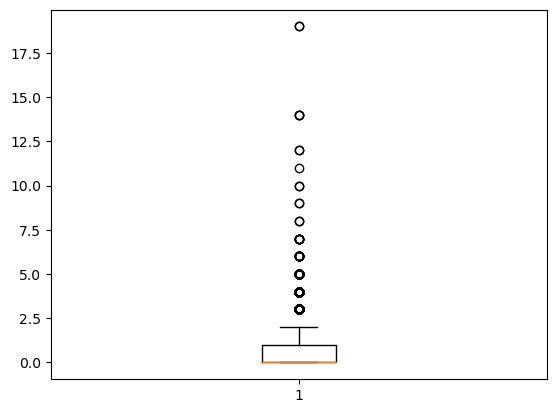

In [128]:
plt.boxplot(application_data['CNT_CHILDREN'])
plt.show()

In [129]:
application_data['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

# <span style="color:green"> Observation
    1. Outliers Present.
    2. for some numbers like children more than equal to 7 is unusual.

### <span style="color:darkmagenta"> Suggestions -
    1. Outlier can be treated by removing this row altogether as there are very few numbers of rows above 7 children.
    2. We are not treating the outlier as suggested in the desciption Manual.

### 4.5.5 CNT_FAM_MEMBERS

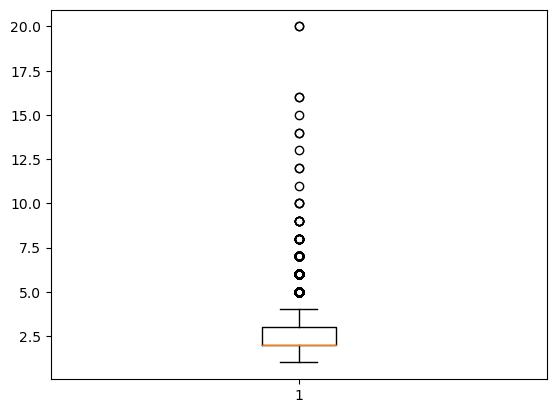

In [162]:
plt.boxplot(application_data['CNT_FAM_MEMBERS'])
plt.show()

### <span style="color:darkmagenta"> Suggestions -
    1. Outlier can be treated by removing this row altogether as there are very few numbers of rows above 10 family members.
    2. We are not treating the outlier as suggested in the desciption Manual.

### 4.5.6 AMT_INCOME_TOTAL

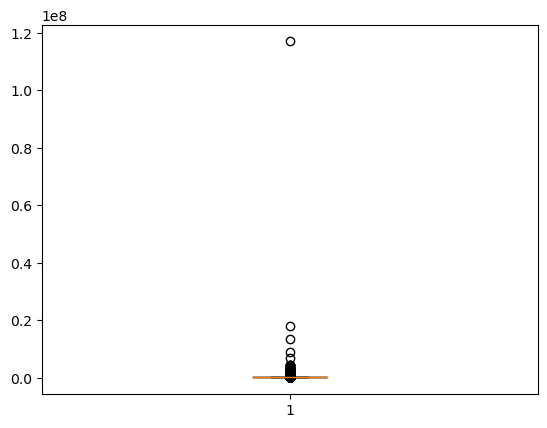

In [163]:
plt.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()

In [167]:
application_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### <span style="color:darkmagenta"> Suggestions -
    1. Outlier can be treated by removing this row where max annual income is 1.170000e+08.
    2. We are not treating the outlier as suggested in the desciption Manual.

### 4.5.7 AMT_CREDIT

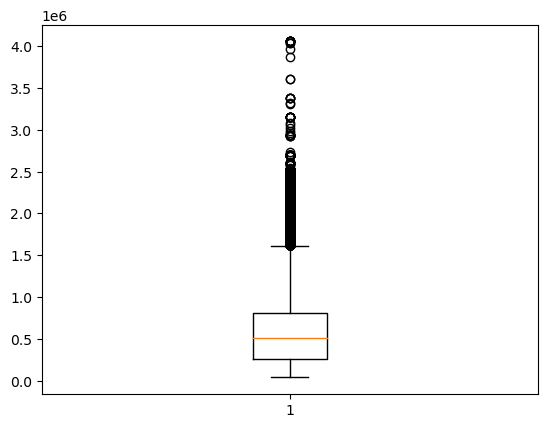

In [164]:
plt.boxplot(application_data['AMT_CREDIT'])
plt.show()

### 4.5.8 AMT_ANNUITY

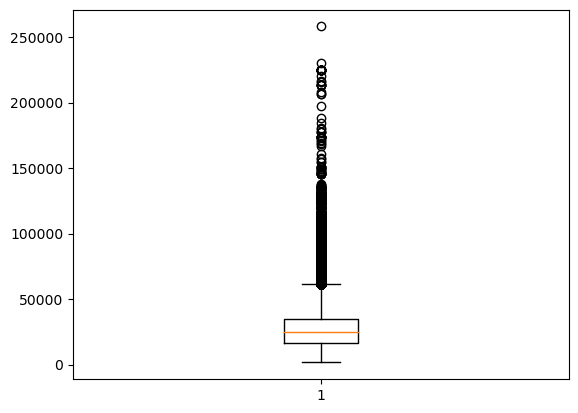

In [172]:
plt.boxplot(application_data['AMT_ANNUITY'])
plt.show()

### <span style="color:darkmagenta"> Suggestions -
    1. Outlier can be treated by according to the analysis needed ahead.
    2. We are not treating the outlier as suggested in the desciption Manual.

# 4.6 Binning 

suggested columns

In [217]:
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin,AGE,Years_employed
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very-High,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-High,54.608219,8.323288
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Middle,46.413699,4.350685
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0

## 4.6.1 NAME_TYPE_SUITE

In [218]:
application_data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

<span style="color:red">
*MUST RUN CELLS
.</span>

In [13]:
# Define a function to map values to the desired categories
def map_relation_type(value):
    if value in ['Family', 'Spouse, partner', 'Children']:
        return 'Family'
    elif value == 'Unaccompanied':
        return 'Unaccompanied'
    else:
        return 'Other'

# Create a new column 'relation_type' using the map_relation_type function
application_data['relation_type'] = application_data['NAME_TYPE_SUITE'].apply(map_relation_type)

In [221]:
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin,AGE,Years_employed,relation_type
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,25.920548,1.745205,Unaccompanied
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very-High,45.931507,3.254795,Family
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle,52.180822,0.616438,Unaccompanied
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Middle-High,52.068493,8.326027,Unaccompanied
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-High,54.608219,8.323288,Unaccompanied
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Middle,46.413699,4.350685,Family
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type

In [224]:
application_data['relation_type'].value_counts()

Unaccompanied    248526
Family            54786
Other              4199
Name: relation_type, dtype: int64

## 4.6.2 AGE

<span style="color:red">
*MUST RUN CELLS
.</span>

In [14]:
# Create bins and labels for age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'AGE_GROUP' based on the bins and labels in df_final
application_data['AGE_GROUP'] = pd.cut(application_data.AGE , bins=age_bins, labels=age_labels)


In [227]:
application_data['AGE'].value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
43.208219    40
             ..
68.213699     1
68.131507     1
21.964384     1
68.761644     1
68.660274     1
Name: AGE, Length: 17460, dtype: int64

In [18]:
application_data.AGE_GROUP.value_counts()

30-40     82308
40-50     76541
50-60     68062
18-30     45021
60-70     35579
0-18          0
70-80         0
80-90         0
90-100        0
Name: AGE_GROUP, dtype: int64

## 4.6.3 Years_employed

<span style="color:red">
*MUST RUN CELLS
.</span>

In [15]:
employed_years = [0, 1, 3, 5, 10, 15, 20, 25, 30,35,40,45,50,60]
years_labels = ['0-1', '1-3', '3-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35','35-40','40-45','45-50','50-60']

# Create a new column 'AGE_GROUP' based on the bins and labels in df_final
application_data['Employed_years'] = pd.cut(application_data.Years_employed , bins=employed_years, labels=years_labels)

In [241]:
application_data['Employed_years'].value_counts()

5-10     64872
1-3      61472
3-5      46857
0-1      27980
10-15    27549
15-20    10849
20-25     6243
25-30     3308
30-35     1939
35-40      832
40-45      210
45-50       24
50-60        0
Name: Employed_years, dtype: int64

## 4.6.4 AMT_INCOME_TOTAL

In [ ]:
# already created Income_bins for this column.

## 4.6.5 AMT_CREDIT

In [242]:
application_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

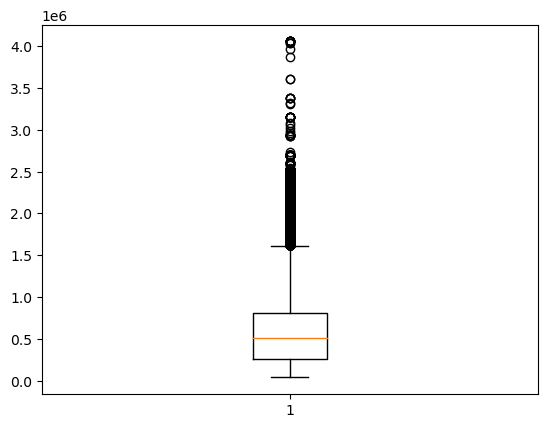

In [243]:
plt.boxplot(application_data.AMT_CREDIT)
plt.show()

<span style="color:red">
*MUST RUN CELLS
.</span>

In [16]:
credit_bins = [45000,100000,250000,500000,750000,1000000,1500000,2000000,3000000,4000000, float('inf')]
credit_labels = ['45-100K','1-2.5L','2.5-5L','5-7.5L','7.5-10L','10-15L','15-20L','20-30L','30-40L','40L+']
application_data['Credit_bins'] = pd.cut(application_data.AMT_CREDIT , bins=credit_bins, labels=credit_labels)

In [251]:
application_data['Credit_bins'].value_counts()

2.5-5L     90135
5-7.5L     65094
1-2.5L     53194
7.5-10L    43099
10-15L     39229
15-20L      8727
45-100K     5774
20-30L      1997
30-40L        22
40L+          10
Name: Credit_bins, dtype: int64

## 4.6.6 AMT_GOODS_PRICE

In [252]:
application_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<span style="color:red">
*MUST RUN CELLS
.</span>

In [17]:
goods_bins = [40000,100000,250000,500000,750000,1000000,1500000,2000000,3000000,4000000, float('inf')]
goods_labels = ['40-100K','1-2.5L','2.5-5L','5-7.5L','7.5-10L','10-15L','15-20L','20-30L','30-40L','40L+']
application_data['Goods_AMT'] = pd.cut(application_data.AMT_GOODS_PRICE , bins=goods_bins, labels=goods_labels)

In [254]:
application_data['Goods_AMT'].value_counts()

2.5-5L     97727
1-2.5L     76182
5-7.5L     57883
7.5-10L    32613
10-15L     27205
40-100K     8709
15-20L      5821
20-30L      1063
30-40L        22
40L+           8
Name: Goods_AMT, dtype: int64

## 4.6.7 AMT_ANNUITY

In [257]:
application_data.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<span style="color:red">
*MUST RUN CELLS
.</span>

In [18]:
Annuity_bins = [1600,5000,10000,50000,100000,150000,200000, float('inf')]
Annuity_labels = ['1.6-5K','5-10K','10-50K','50-100K','100-150K','150-200K','200K+']
application_data['Annuity'] = pd.cut(application_data.AMT_ANNUITY , bins=Annuity_bins, labels=Annuity_labels)

# 4.7 Dropping Irrelevant Columns

<span style="color:red">
*MUST RUN CELLS
.</span>

In [19]:
drop_columns = ["DAYS_BIRTH","AGE","Years_employed","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]
application_data.drop(columns=drop_columns, inplace=True)

columns_to_drop = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_7','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',]
application_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
#application_data.drop("DAYS_BIRTH",inplace=True,axis=1)
#application_data.drop("AGE",inplace=True,axis=1)
#application_data.drop("Years_employed",inplace=True,axis=1)
#application_data.drop("DAYS_EMPLOYED",inplace=True,axis=1)
#application_data.drop("DAYS_REGISTRATION",inplace=True,axis=1)
#application_data.drop("DAYS_ID_PUBLISH",inplace=True,axis=1)

In [20]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Bin,relation_type,AGE_GROUP,Employed_years,Credit_bins,Goods_AMT,Annuity
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,High,Unaccompanied,18-30,1-3,2.5-5L,2.5-5L,10-50K
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,Very-High,Family,40-50,3-5,10-15L,10-15L,10-50K
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,Middle,Unaccompanied,50-60,0-1,1-2.5L,1-2.5L,5-10K
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,Middle-High,Unaccompanied,50-60,5-10,2.5-5L,2.5-5L,10-50K
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,Middle-High,Unaccompanied,50-60,5-10,5-7.5L,5-7.5L,10-50K


## Treating CODE_GENDER column

In [270]:
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<span style="color:red">
*MUST RUN CELLS
.</span>

In [21]:
application_data.CODE_GENDER.replace("XNA","F",inplace=True)
application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## FLAG_OWN_CAR Replacing Y and N with 1 and 0

In [275]:
# example of Encoding

In [272]:
application_data.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

<span style="color:red">
*MUST RUN CELLS
.</span>

In [22]:
application_data.FLAG_OWN_CAR.replace({"Y":1,"N":0},inplace=True)

In [59]:
application_data.shape

(307511, 51)

# Previous Application

# <span style="color:blue">Step 5 - Data Imbalance / Numeric and Non-Numeric data/ Correlation </span>

## Problem Statement
Identify if there is data imbalance in the data. Find the ratio of data imbalance.

<span style="color:red">
*MUST RUN CELLS
.</span>

In [23]:
application_data['TARGET'].value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

imbalance ratio - TARGET(0) / TARGET(1) which is 11.387. 
That means 1 in every 11 client is a defaulter. 

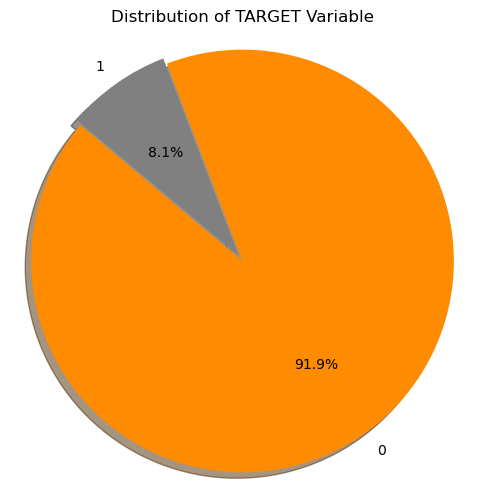

In [25]:
target_counts = application_data['TARGET'].value_counts()
colors = ['#FF8C00','#808080']

# Explode the slices for emphasis (0.05 means 10% explode)
explode = (0.03, 0)

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

plt.title('Distribution of TARGET Variable')

# Show the plot
plt.show()

Since this is the case of Data Imbalance, we are splitting the application_data into df_0 containing the clients with no payment difficulties and df_1 for client with payment difficulties for better capture variable characteristics for differentiating the clients with payment difficulties with all other cases.

# Repayers table consisting both numerical and categorical

<span style="color:red">
*MUST RUN CELLS
.</span>

In [26]:
df_0_repayers = application_data[application_data['TARGET'] == 0]

# Defaulters table consisting both numerical and categorical

<span style="color:red">
*MUST RUN CELLS
.</span>

In [27]:
df_1_defaulters = application_data[application_data['TARGET'] == 1]

## Problem Statement - Correlation between variables
Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). 

<span style="color:red">
*MUST RUN CELLS
.</span>

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
df_1_defaulters.corr()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.000632,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.003816,...,-0.009058,-0.009428,0.002455,-0.004640,-0.012036,-0.007954,-0.002999,0.006436,-0.000880,0.008916
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,0.000632,NaN,1.000000,0.067519,0.017103,0.095546,0.136593,0.098654,0.029231,0.110044,...,0.013699,-0.014866,-0.049023,-0.073150,0.004898,-0.008686,0.000396,0.025612,-0.013610,-0.009258
CNT_CHILDREN,-0.005144,NaN,0.067519,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.885484,...,0.025180,-0.005106,0.011547,0.060561,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,-0.010165,NaN,0.017103,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.006654,...,-0.004616,-0.004866,-0.002429,0.001446,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001290,NaN,0.095546,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,0.051224,...,0.019487,-0.030880,-0.110851,0.061629,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,-0.007578,NaN,0.136593,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,0.075711,...,0.005500,-0.027495,-0.079870,0.104865,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.001816,NaN,0.098654,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,0.047388,...,0.020385,-0.026179,-0.118303,0.038317,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
REGION_POPULATION_RELATIVE,0.006301,NaN,0.029231,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,-0.030163,...,0.006793,0.018231,-0.055139,-0.042197,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.000602
CNT_FAM_MEMBERS,-0.003816,NaN,0.110044,0.885484,0.006654,0.051224,0.075711,0.047388,-0.030163,1.000000,...,0.043308,-0.000777,-0.013360,0.066865,-0.000798,-0.018203,-0.010800,-0.009169,-0.012842,-0.012684


finding correlation wrt top 10 variables

### df_1_defaulters

In [287]:
application_data.dtypes.value_counts()

int64       14
float64     14
object      11
int32        1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

# Segregating Numerical and num-categorical data from application data

In [61]:
application_data.dtypes.value_counts()

float64     18
int64       14
object      12
int32        1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

<span style="color:red">
*MUST RUN CELLS
.</span>

In [29]:
# creating numeric variables
numeric_var = application_data.select_dtypes(include = ['float64','int64','int32']).columns
numeric_categorical_var = application_data.select_dtypes(include = ['float64','int64','int32','category']).columns
len(numeric_var)

33

<span style="color:red">
*MUST RUN CELLS
.</span>

In [30]:
numeric_categorical_data = application_data[numeric_categorical_var]

<span style="color:red">
*MUST RUN CELLS
.</span>

In [31]:
categorical_var = application_data.select_dtypes(include = ['category']).columns

<span style="color:red">
*MUST RUN CELLS
.</span>

In [32]:
categorical_data = application_data[categorical_var]

# dividing numerical into defaulters and non-defaulters

<span style="color:red">
*MUST RUN CELLS
.</span>

In [33]:
numerical_data = application_data[numeric_var]
defaulters = numerical_data[numerical_data['TARGET']== 1].drop(['TARGET'], axis =1)
numerical_data.shape

(307511, 33)

In [34]:
numerical_data.columns.shape

(33,)

<span style="color:red">
*MUST RUN CELLS
.</span>

In [35]:
non_defaulters = numerical_data[numerical_data['TARGET']== 0].drop(['TARGET'], axis =1)

<span style="color:red">
*MUST RUN CELLS
.</span>

In [36]:
defaulters_corr = defaulters.corr()
defaulters_corr_unstack = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape), k=1).astype(bool)).unstack().reset_index().rename(columns ={'level_0':'var1','level_1':'var2',0:'corr'})

<span style="color:red">
*MUST RUN CELLS
.</span>

In [37]:
defaulters_corr_unstack['corr'] = abs(defaulters_corr_unstack['corr'])
defaulters_corr_unstack.sort_values(by = ['corr'],ascending = False).head(10)

,var1,var2,corr
724,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
196,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
329,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
258,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
757,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
461,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
560,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
197,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
164,AMT_ANNUITY,AMT_CREDIT,0.752195
428,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497937


# <span style="color:darkmagenta"> Observation -
    1. above are the top 10 variables highly correlated for defaulters data.
    2. OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE are the most highly correlated variables. 


<span style="color:red">
*MUST RUN CELLS
.</span>

In [38]:
non_defaulters_corr = non_defaulters.corr()
non_defaulters_corr_unstack = non_defaulters_corr.where(np.triu(np.ones(non_defaulters_corr.shape), k=1).astype(bool)).unstack().reset_index().rename(columns ={'level_0':'var1','level_1':'var2',0:'corr'})

<span style="color:red">
*MUST RUN CELLS
.</span>

In [39]:
non_defaulters_corr_unstack['corr'] = abs(non_defaulters_corr_unstack['corr'])
non_defaulters_corr_unstack.sort_values(by = ['corr'],ascending = False).head(10)

,var1,var2,corr
724,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
196,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
329,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
258,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
461,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
757,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
560,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
197,AMT_GOODS_PRICE,AMT_ANNUITY,0.776674
164,AMT_ANNUITY,AMT_CREDIT,0.771297
295,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539005


# <span style="color:darkmagenta"> Observation -
    1. top 10 variables highly correlated for non-defaulters data
    2. OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE are the most highly correlated variables. 


## Plotting Correlation Matrix

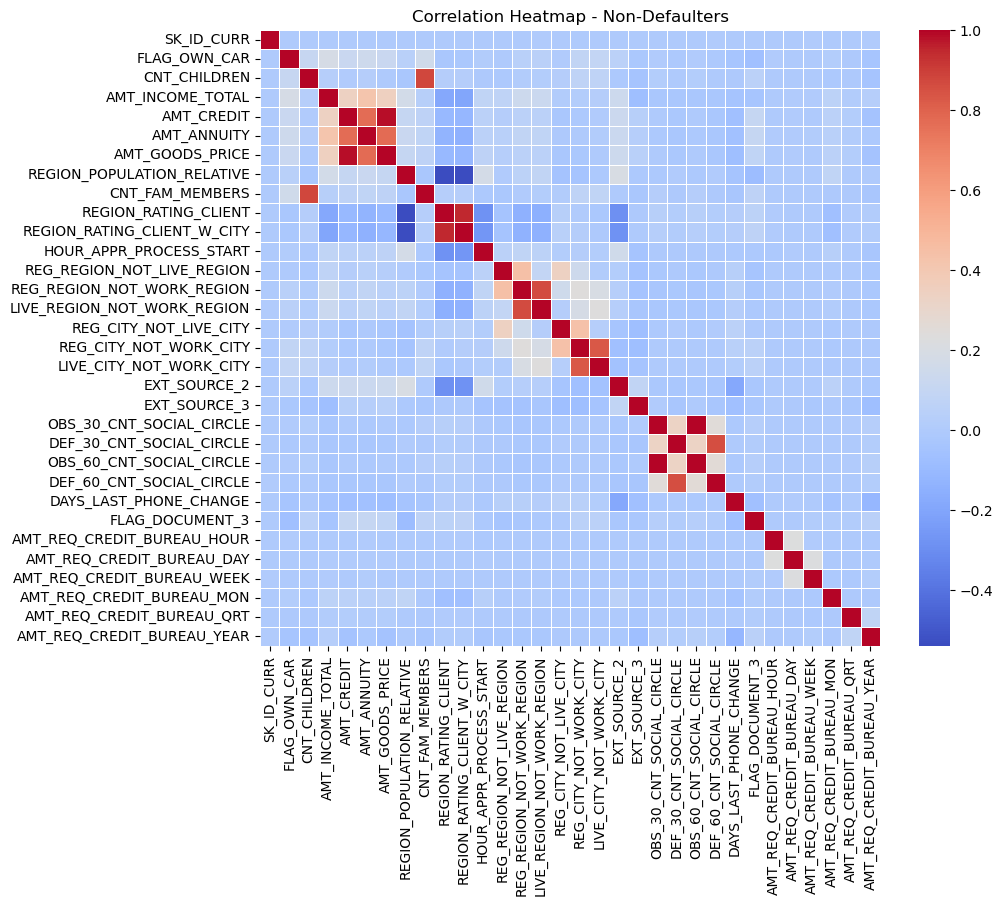

In [40]:
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(non_defaulters_corr, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap - Non-Defaulters')

# Show the plot
plt.show()

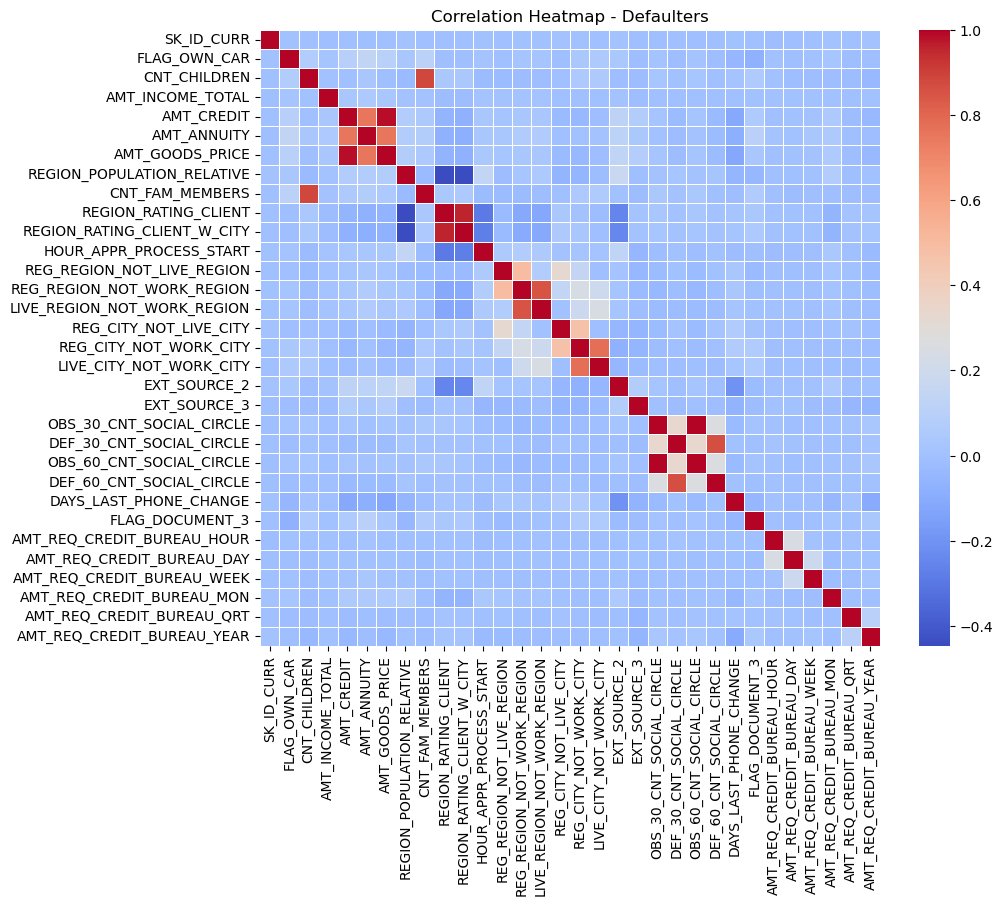

In [41]:
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(defaulters_corr, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap - Defaulters')

# Show the plot
plt.show()

# <span style="color:blue">Step 6 - Univariate Analysis </span>

Inspecting columns in numerical_data table. 

In [70]:
numerical_data.columns.shape

(33,)

In [71]:
numerical_data.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### Since while running for loop for such number of columns and heavy data, sometimes the Proceesor stops working, so to rectify that issue, we are segregating column names into 3 different list and then run for loop.

<span style="color:red">
*MUST RUN CELLS
.</span>

In [42]:
numerical_columns1 = ['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT']
numerical_columns2 = ['REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE']
numerical_columns3 = ['DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

we are plotting different columns in numerical_column table with Hue as TARGET variable

<Figure size 800x600 with 0 Axes>

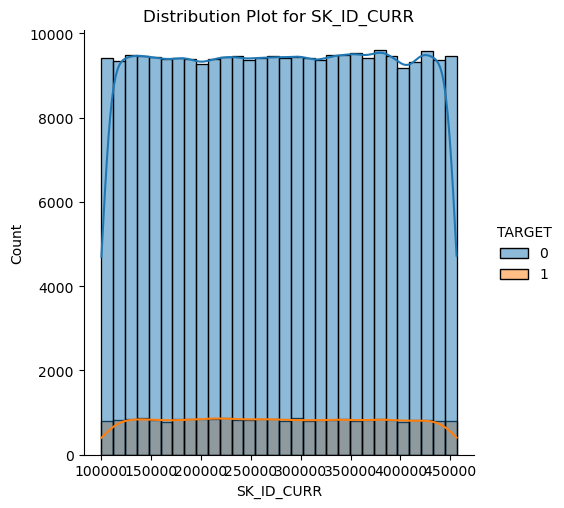

<Figure size 800x600 with 0 Axes>

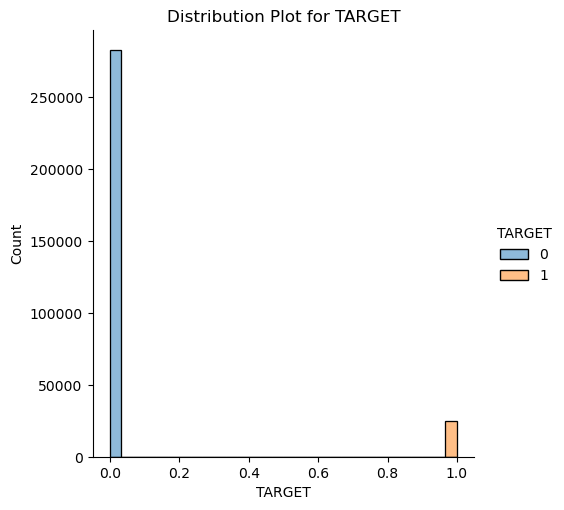

<Figure size 800x600 with 0 Axes>

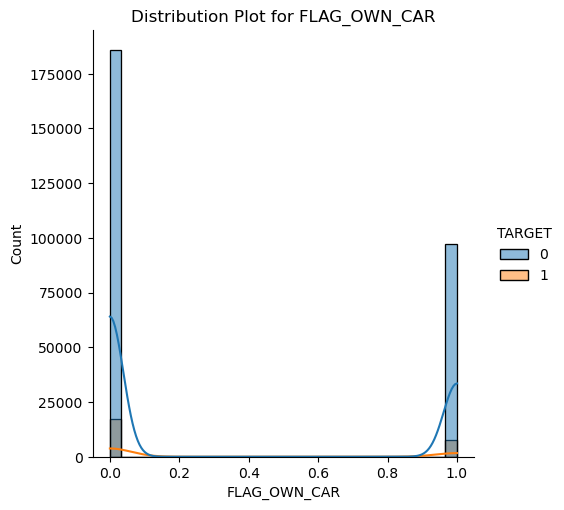

<Figure size 800x600 with 0 Axes>

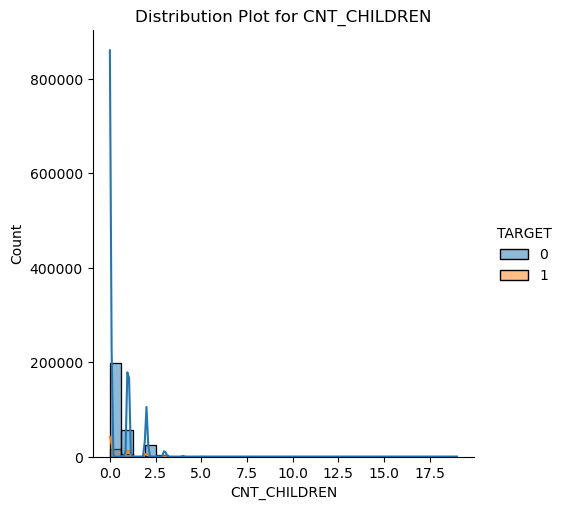

<Figure size 800x600 with 0 Axes>

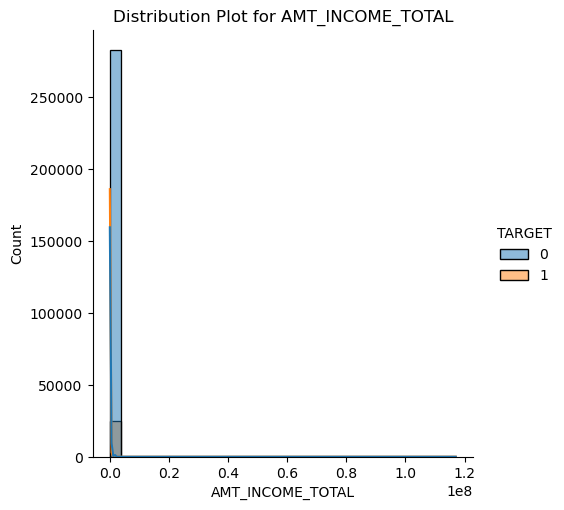

<Figure size 800x600 with 0 Axes>

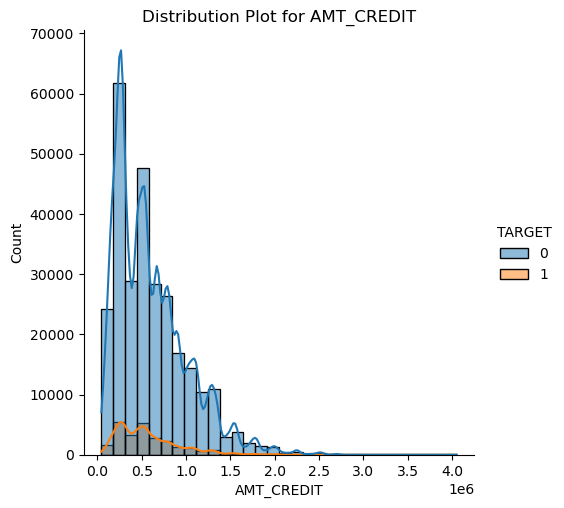

<Figure size 800x600 with 0 Axes>

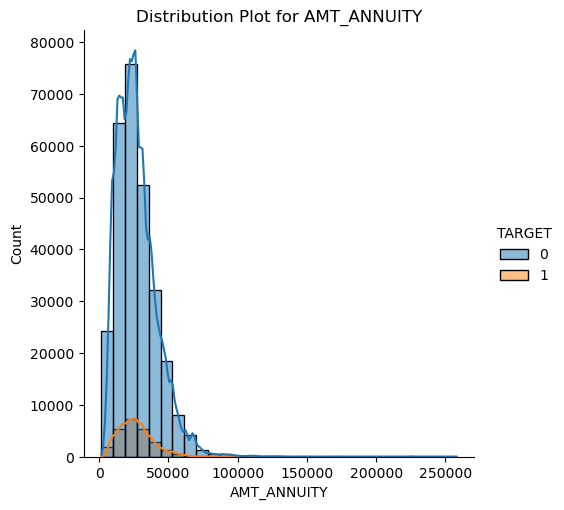

<Figure size 800x600 with 0 Axes>

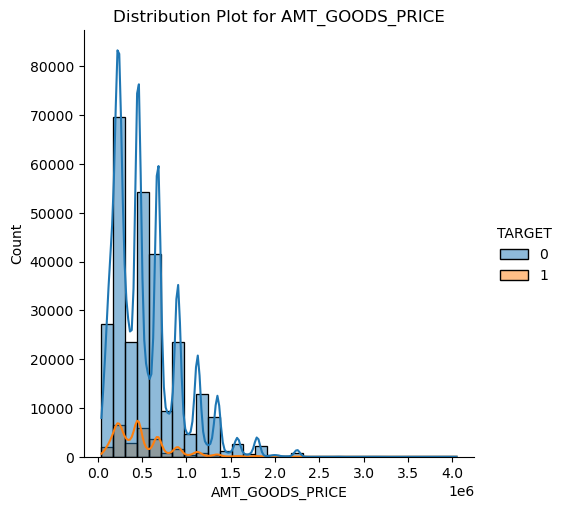

<Figure size 800x600 with 0 Axes>

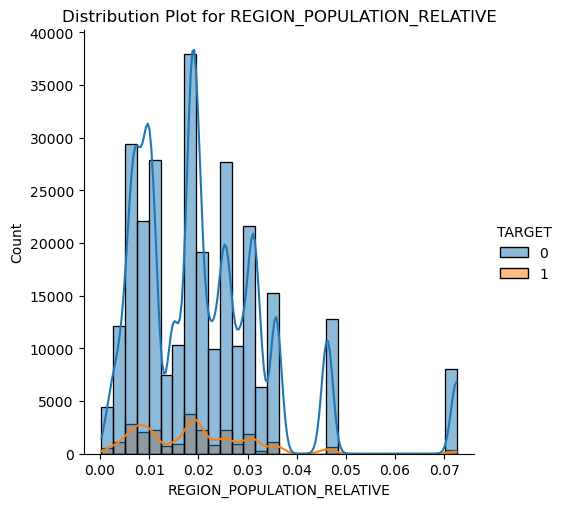

<Figure size 800x600 with 0 Axes>

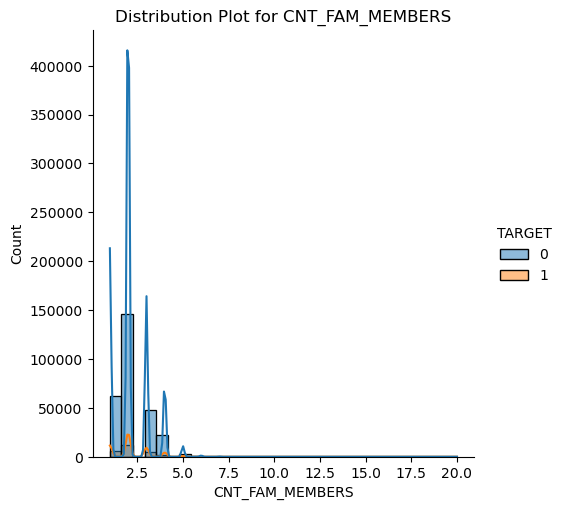

<Figure size 800x600 with 0 Axes>

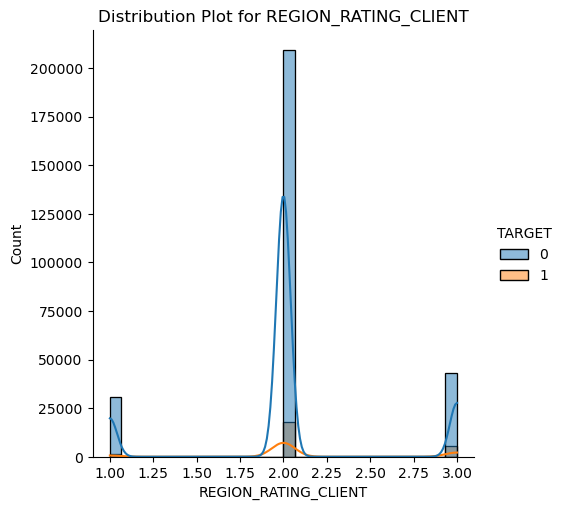

In [43]:
for column in numerical_columns1:
    # Create a distribution plot for each column
    plt.figure(figsize=(8, 6))
    sns.displot(numerical_data, x=column, hue='TARGET', kde=True, bins=30,   color ='#158685')
    plt.title(f'Distribution Plot for {column}')
    plt.show()

<Figure size 800x600 with 0 Axes>

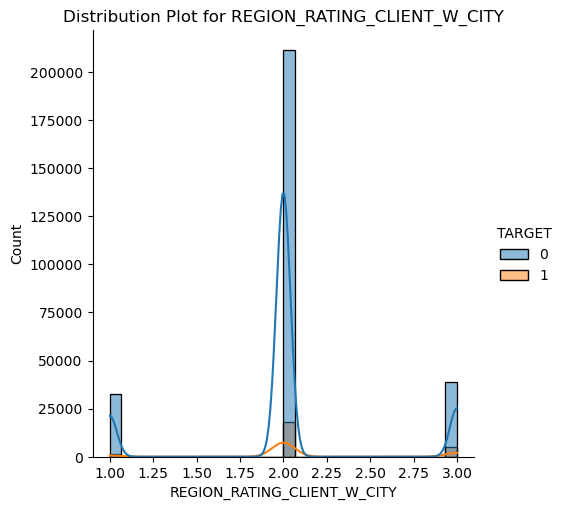

<Figure size 800x600 with 0 Axes>

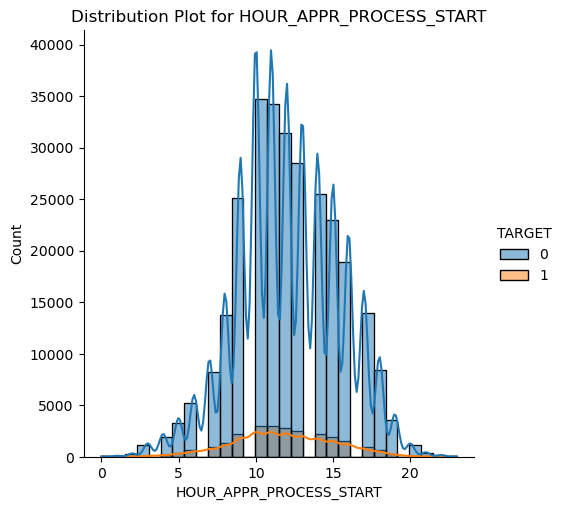

<Figure size 800x600 with 0 Axes>

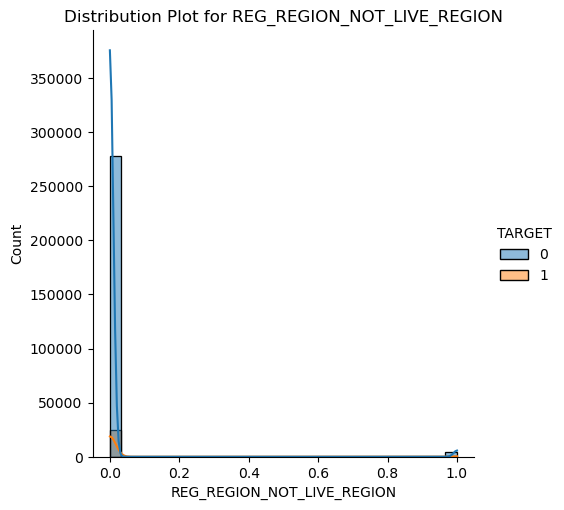

<Figure size 800x600 with 0 Axes>

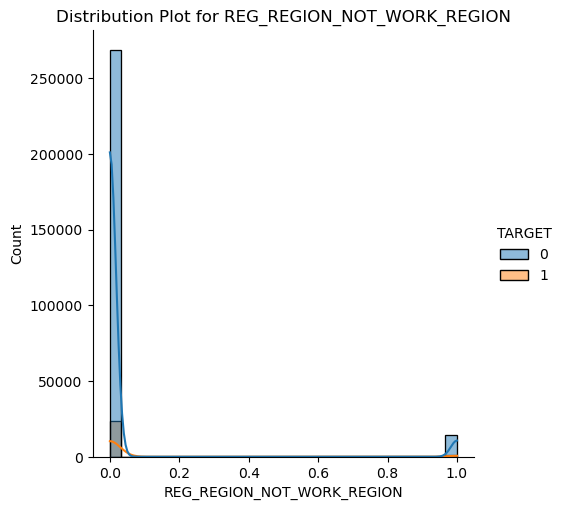

<Figure size 800x600 with 0 Axes>

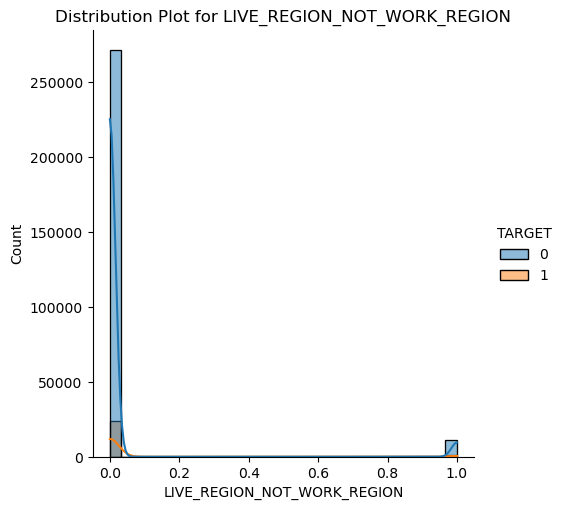

<Figure size 800x600 with 0 Axes>

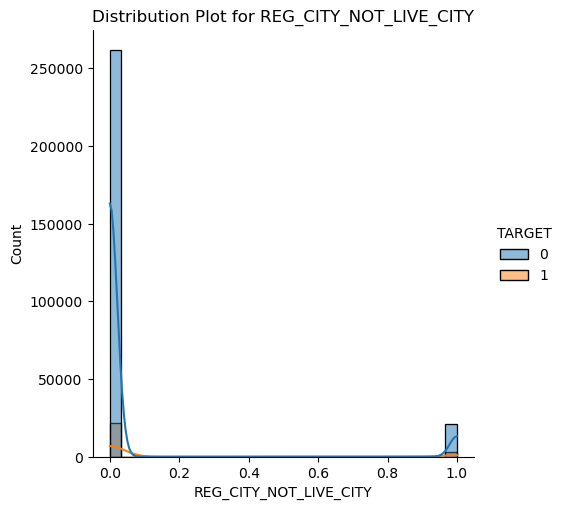

<Figure size 800x600 with 0 Axes>

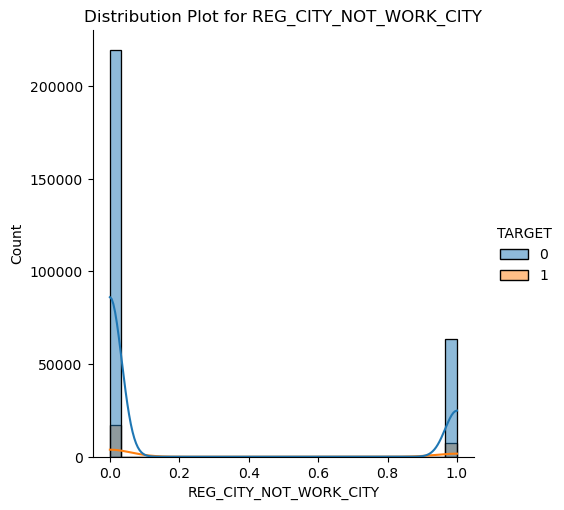

<Figure size 800x600 with 0 Axes>

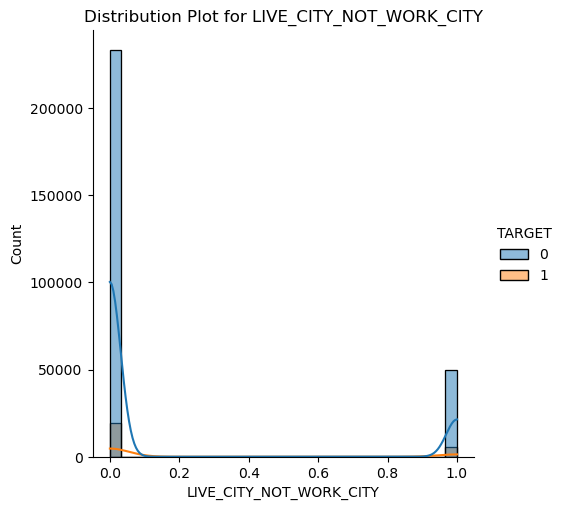

<Figure size 800x600 with 0 Axes>

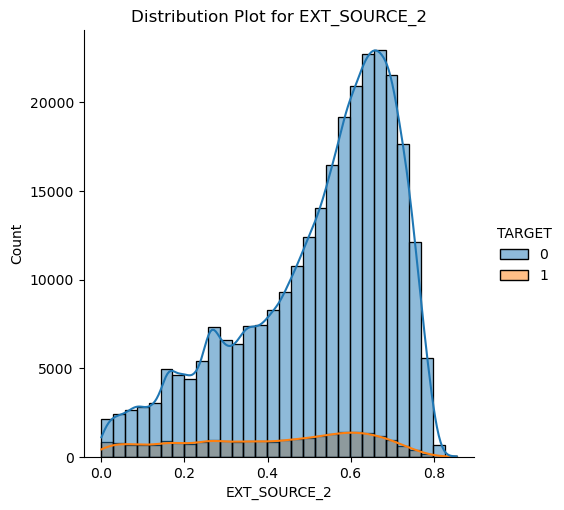

<Figure size 800x600 with 0 Axes>

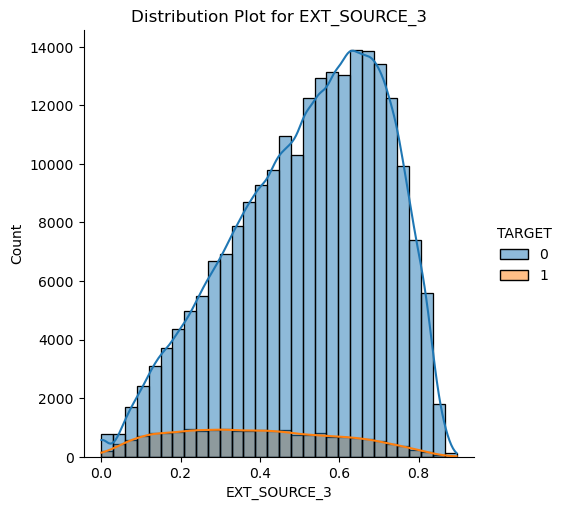

<Figure size 800x600 with 0 Axes>

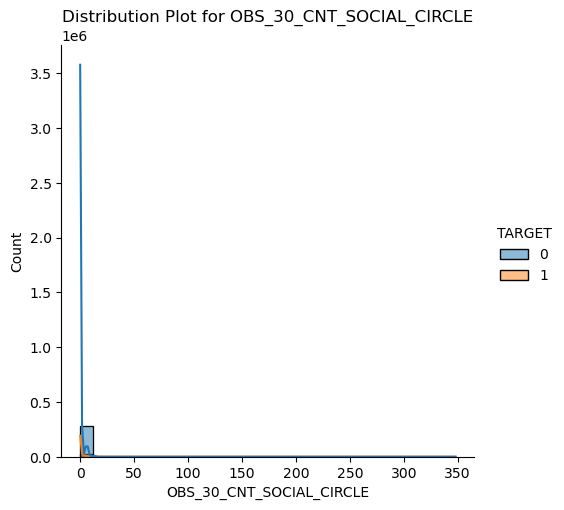

In [45]:
for column in numerical_columns2:
    # Create a distribution plot for each column
    plt.figure(figsize=(8, 6))
    sns.displot(numerical_data, x=column, hue='TARGET', kde=True, bins=30,   color ='#158685')
    plt.title(f'Distribution Plot for {column}')
    plt.show()

<Figure size 800x600 with 0 Axes>

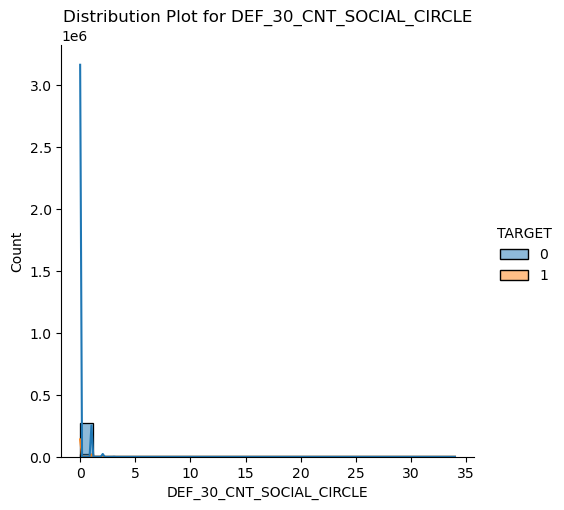

<Figure size 800x600 with 0 Axes>

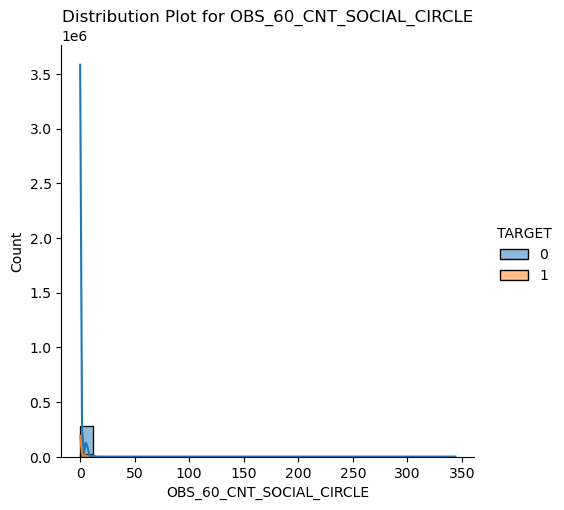

<Figure size 800x600 with 0 Axes>

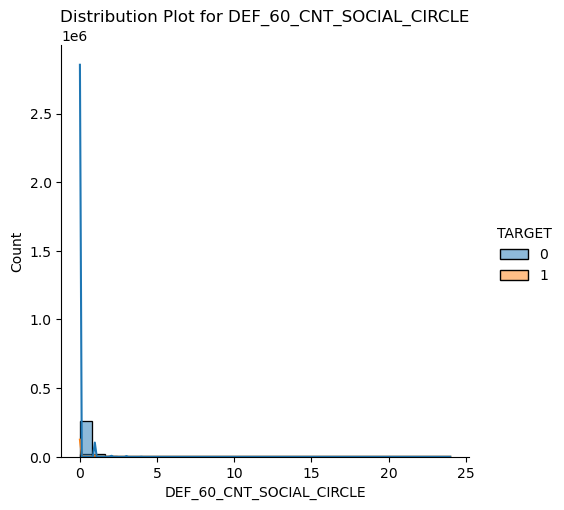

<Figure size 800x600 with 0 Axes>

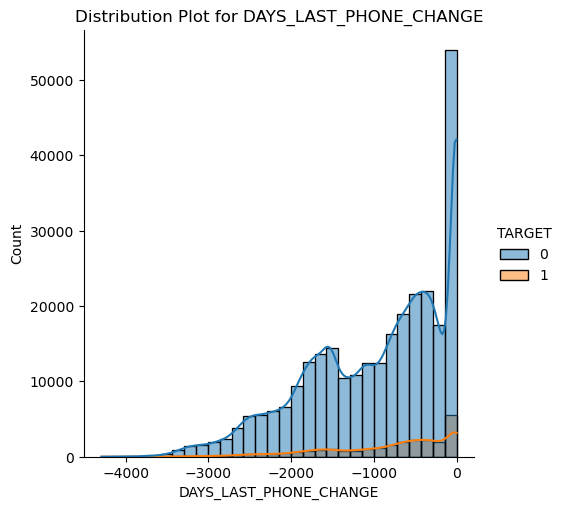

<Figure size 800x600 with 0 Axes>

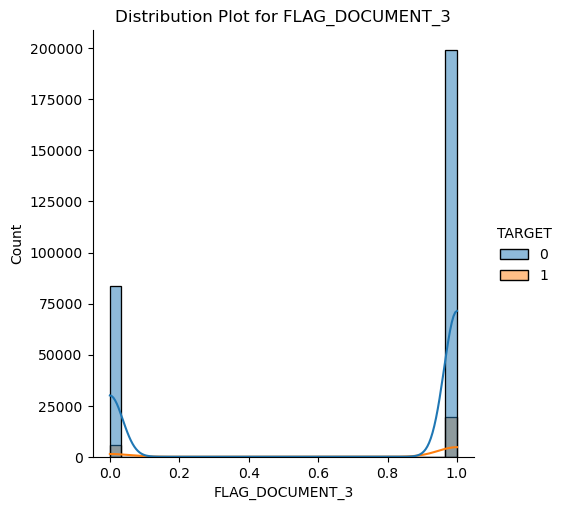

<Figure size 800x600 with 0 Axes>

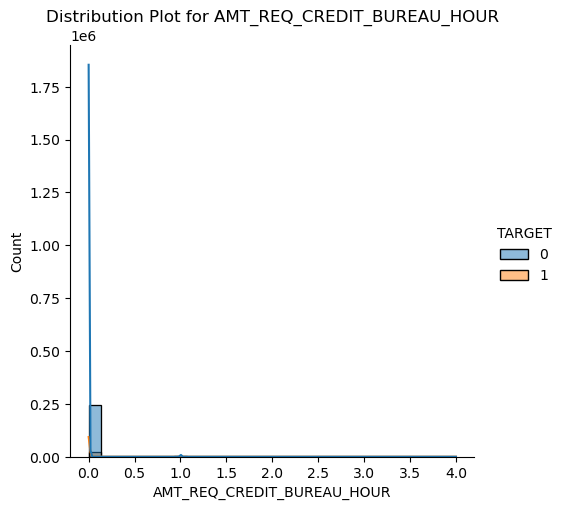

<Figure size 800x600 with 0 Axes>

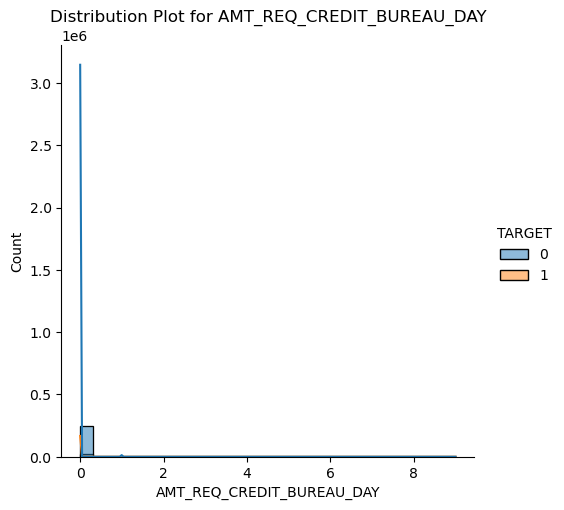

<Figure size 800x600 with 0 Axes>

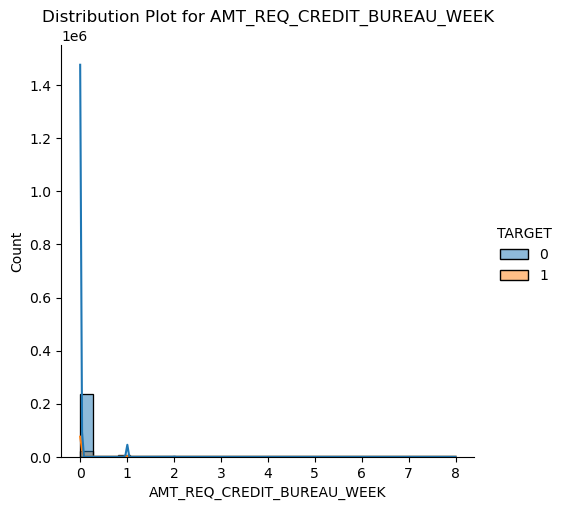

<Figure size 800x600 with 0 Axes>

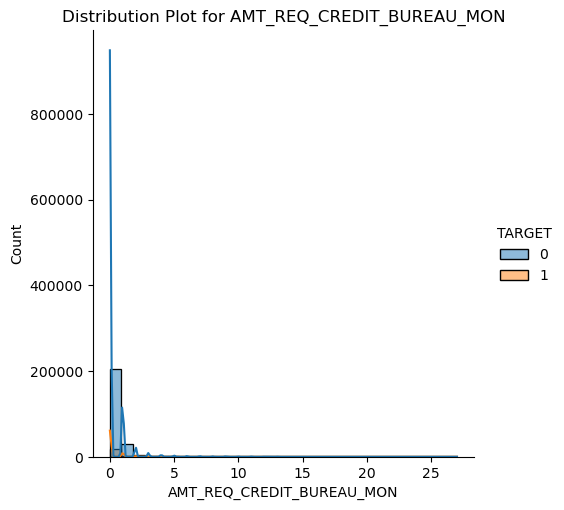

<Figure size 800x600 with 0 Axes>

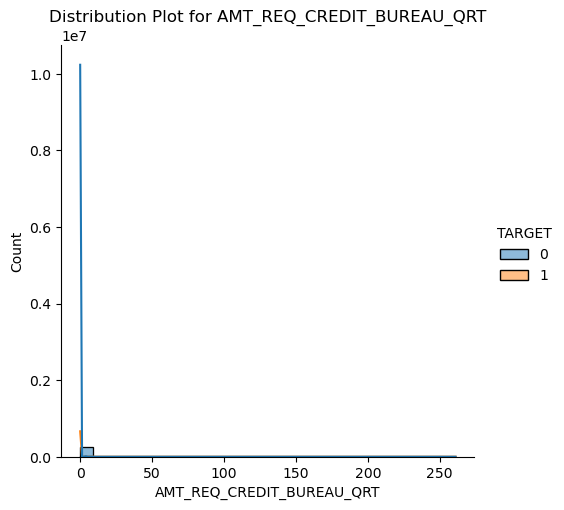

<Figure size 800x600 with 0 Axes>

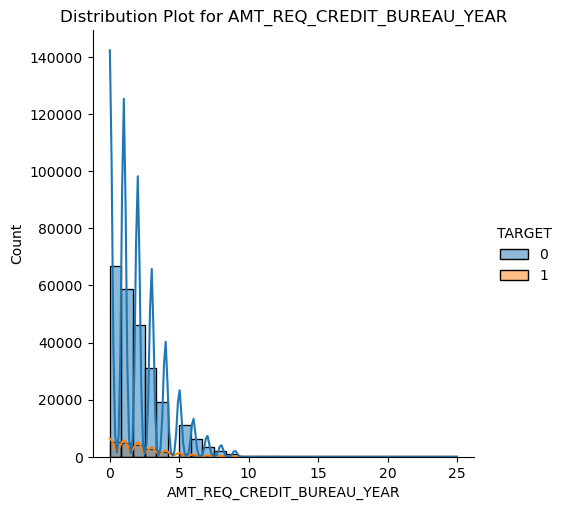

In [44]:
for column in numerical_columns3:
    # Create a distribution plot for each column
    plt.figure(figsize=(8, 6))
    sns.displot(numerical_data, x=column, hue='TARGET', kde=True, bins=30,   color ='#158685')
    plt.title(f'Distribution Plot for {column}')
    plt.show()

# <span style="color:darkmagenta"> Analysis -
    1. Most of the customers who have taken the loan and not defaulted has annual income between 0-10 crore.
    2. Most loans were given for price range of 0-5 lakhs of goods price. 
    3. Most loans were given for credit amount of 0-2 lakhs.
    4. Most customers are paying annuity between 0 to 50,000 rupees
    5. Most customers applying for loans have 0 childrens.
    6. Most clients have no cars who are applying for loans.
    7. Family members → client with upto 3 family members applies more for loan.
    8. Client with regions of population density between .01 to .03 applies more for loans


# For Categorical datas

In [46]:
categorical_data.columns

Index(['Income_Bin', 'AGE_GROUP', 'Employed_years', 'Credit_bins', 'Goods_AMT',
       'Annuity'],
      dtype='object')

<span style="color:red">
*MUST RUN CELLS
.</span>

In [47]:
categorical_columns = ['Income_Bin', 'AGE_GROUP', 'Employed_years', 'Credit_bins', 'Goods_AMT',
       'Annuity']

<span style="color:red">
*MUST RUN CELLS
.</span>

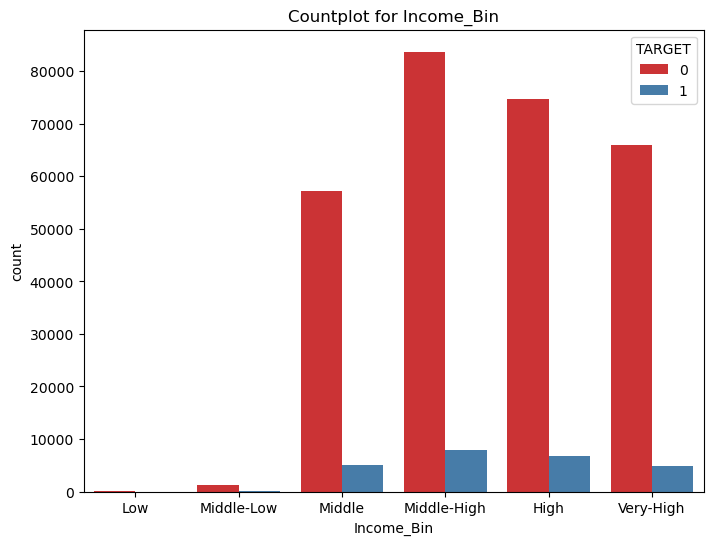

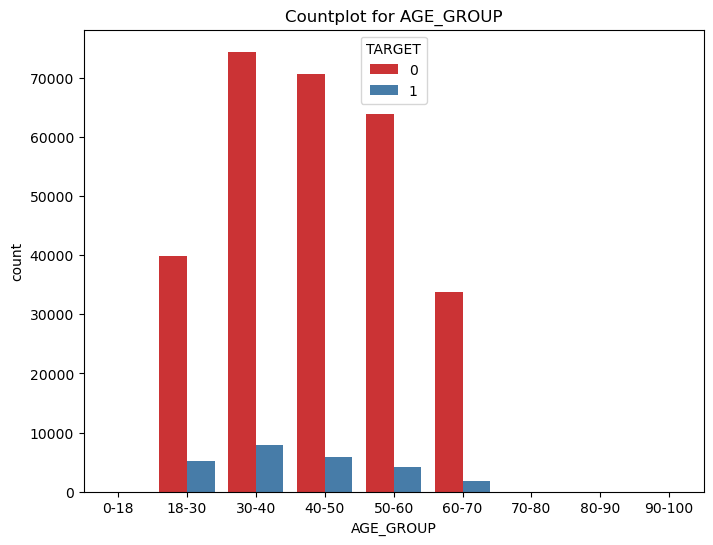

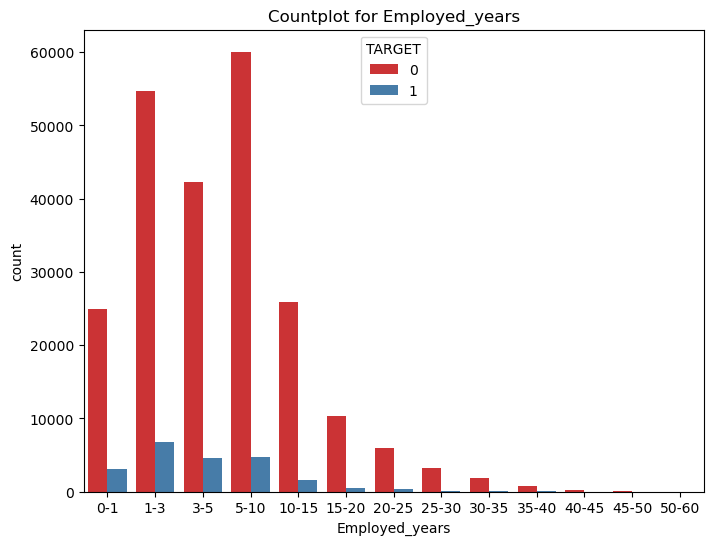

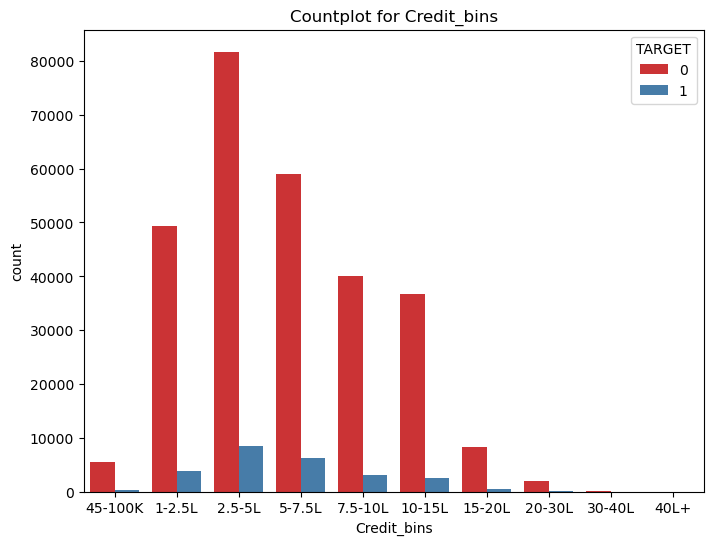

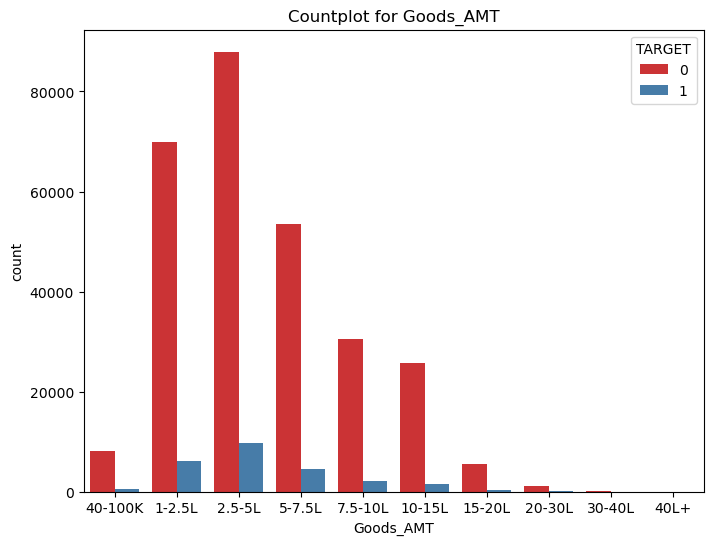

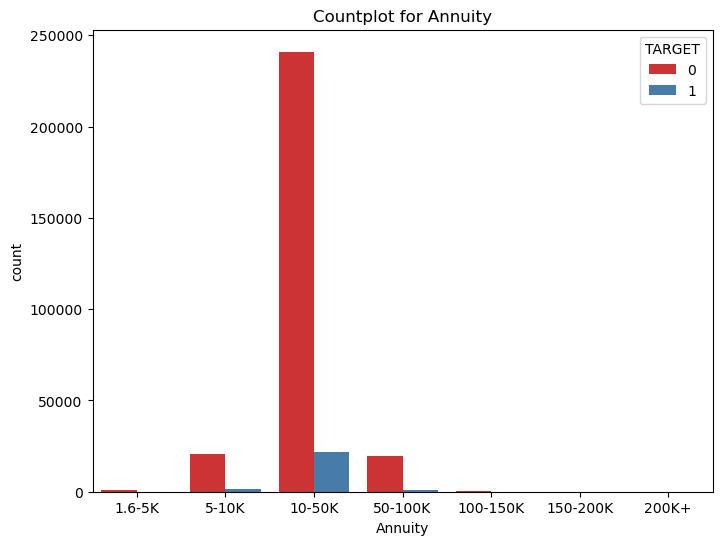

In [48]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=categorical_data, hue= numerical_data['TARGET'], palette='Set1')
    plt.title(f'Countplot for {column}')
    plt.show()

# <span style="color:darkmagenta"> Analysis -
    1.	Most clients are from middle-high income group applying for loans.
    2. People aged 30-40 years are highest to apply for loans.
    3. Emplyers with 5-10 years of employment are highest applicant for applying for loans followed by employers of 1-3 years of employment.
    4. Most loans are given in range of 2.5-5 lakhs.
    5. Goods prized between 2.5-5 lakhs stood first for credit applications.
    6. Most annuity is paid for price range of 10-50 thousands.


In [49]:
numeric_categorical_data.columns.shape

(39,)

### Plotting Histograms for OCCUPATION_TYPE COLUMN wrt TARGET 0 variable. 

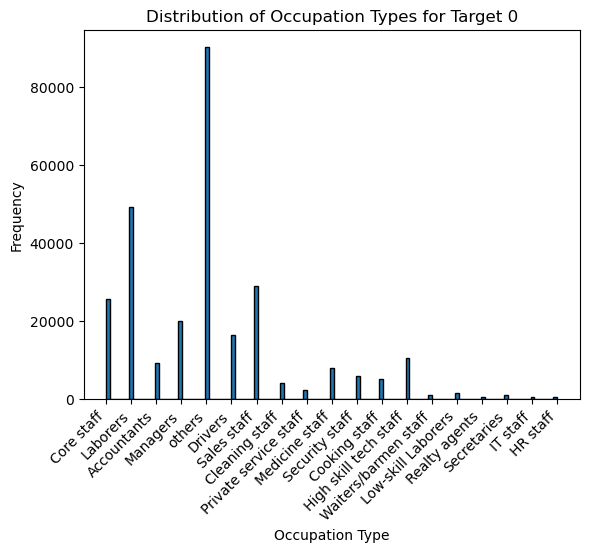

In [52]:
plt.hist(df_0_repayers['OCCUPATION_TYPE'],bins='auto', edgecolor='black')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Occupation Type')
plt.ylabel('Frequency')
plt.title('Distribution of Occupation Types for Target 0')
plt.show()

### Plotting Histograms for OCCUPATION_TYPE COLUMN wrt TARGET 1 variable. 

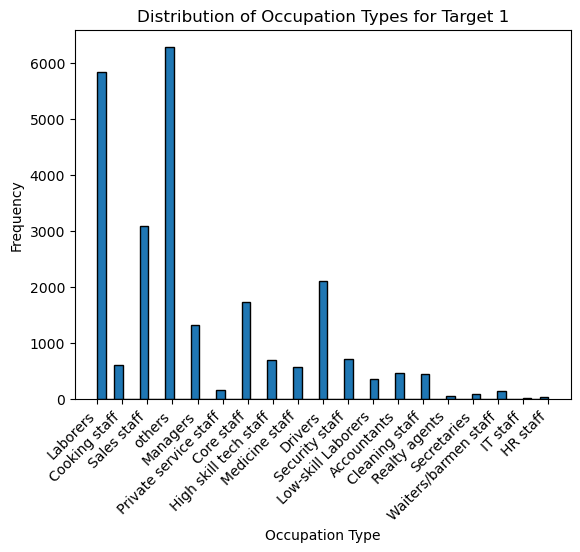

In [53]:
plt.hist(df_1_defaulters['OCCUPATION_TYPE'],bins='auto', edgecolor='black')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Occupation Type')
plt.ylabel('Frequency')
plt.title('Distribution of Occupation Types for Target 1')
plt.show()

# <span style="color:darkmagenta"> Analysis -
    1.

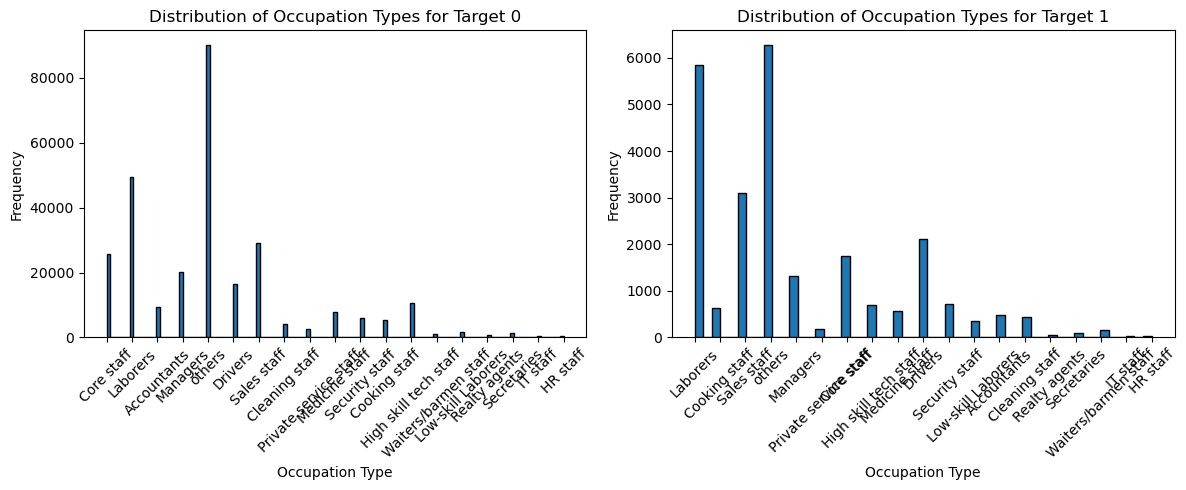

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# Plot for df_0
axes[0].hist(df_0_repayers['OCCUPATION_TYPE'], bins='auto', edgecolor='black')
axes[0].set_title('Distribution of Occupation Types for Target 0')
axes[0].set_xlabel('Occupation Type')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for df_1
axes[1].hist(df_1_defaulters['OCCUPATION_TYPE'], bins='auto', edgecolor='black')
axes[1].set_title('Distribution of Occupation Types for Target 1')
axes[1].set_xlabel('Occupation Type')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout() 
plt.show()

# <span style="color:darkmagenta"> Analysis -
    1.
    

# <span style="color:blue">Step 7 - Bivariate Analysis </span>

In [90]:
numerical_data.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### for our bivariate analysis we are specifically choosing AMT_CREDIT from our numerical data table and plotting against different columns with hue as TARGET. Reason for choosing AMT_CREDIT is that it given insights which are relevant for financing Loans. so that institution can understand what amount of credit should be given for making high profits.

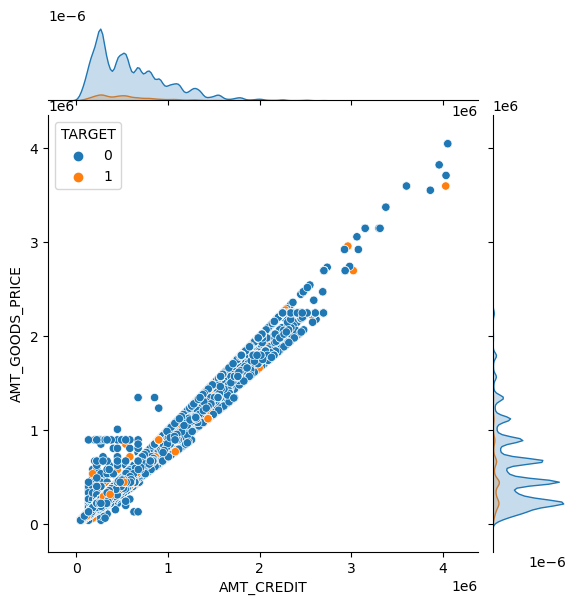

In [55]:
data = numerical_data
sns.jointplot(data = numerical_data, x= 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', hue = 'TARGET')
plt.show()

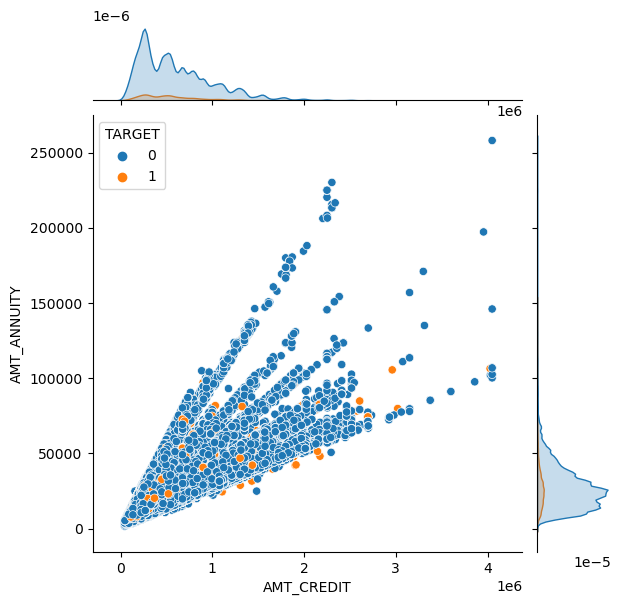

In [104]:
data = numerical_data
sns.jointplot(data = numerical_data, x= 'AMT_CREDIT', y = 'AMT_ANNUITY', hue = 'TARGET')
plt.show()

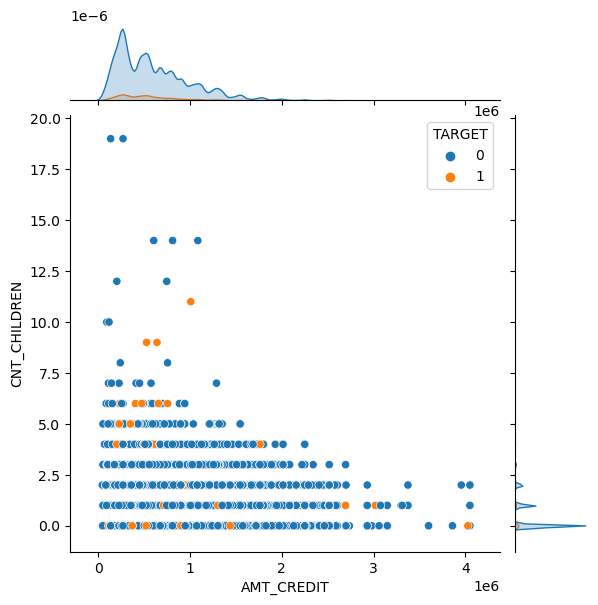

In [56]:
data = numerical_data
sns.jointplot(data = numerical_data, x= 'AMT_CREDIT', y = 'CNT_CHILDREN', hue = 'TARGET')
plt.show()

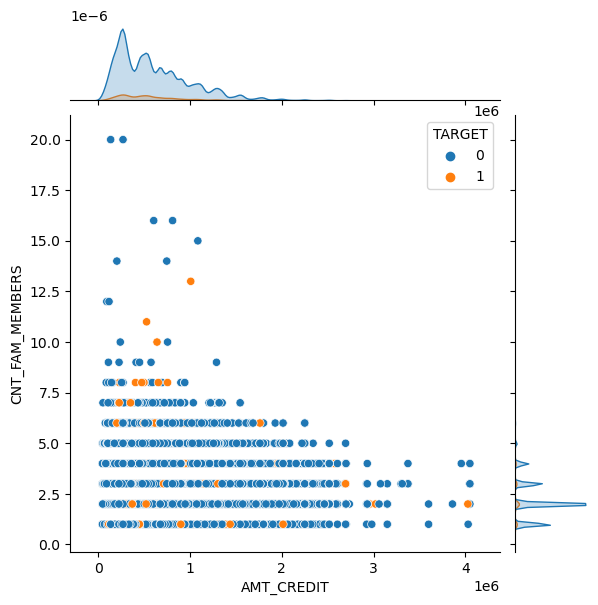

In [106]:
data = numerical_data
sns.jointplot(data = numerical_data, x= 'AMT_CREDIT', y = 'CNT_FAM_MEMBERS', hue = 'TARGET')
plt.show()

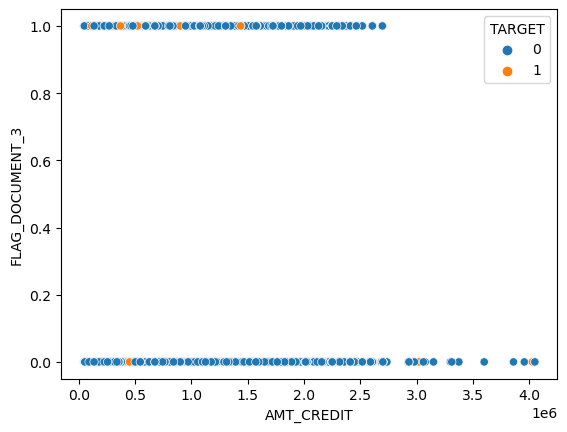

In [100]:
sns.scatterplot(data = numerical_data, x= 'AMT_CREDIT', y = 'FLAG_DOCUMENT_3', hue = 'TARGET')
plt.show()

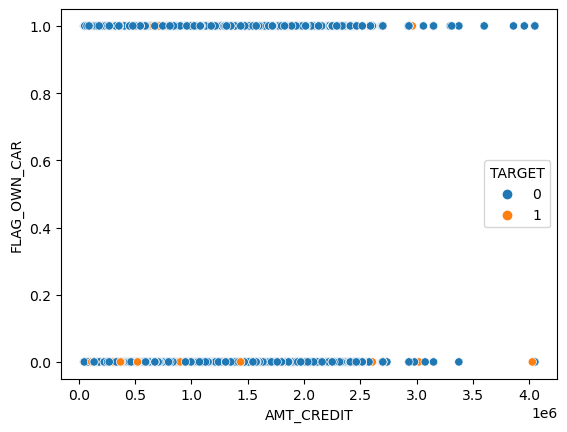

In [101]:
sns.scatterplot(data = numerical_data, x= 'AMT_CREDIT', y = 'FLAG_OWN_CAR', hue = 'TARGET')
plt.show()

## Trying some pairplots for Amount variables

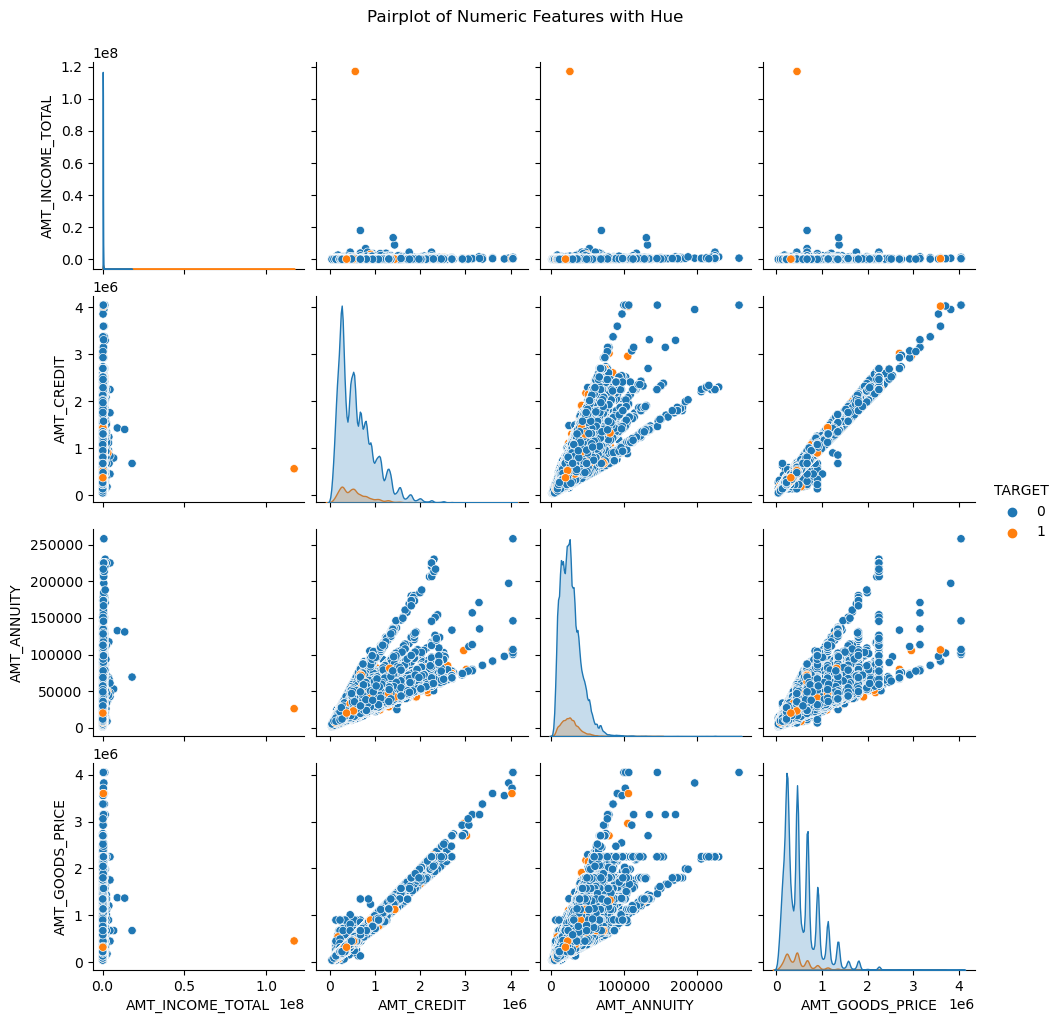

In [57]:
columns_of_interest = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Create a pairplot with hue as 'TARGET'
sns.pairplot(numerical_data, vars=columns_of_interest, hue='TARGET', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features with Hue', y=1.02)
plt.show()

# <span style="color:darkmagenta"> Analysis -
    1. People who have no children and loan amount is upto 15 lakhs are more deafulters.
    2. People with no children and loan amount greter than 15 lakhs are less defaulters.
    3. People with more than 5 childrens are more defaulters.
    4. People between 1-4 childrens are less likely to default.
    
    5.client with more than 7 family members is most likely to default for credit upto 10 lakhs.   
    6. client with family members 4-5 are least likely to default in all loan ranges. 
    7. client with 2 family members are most likely to default for credit of upto 10 lakhs.
    
    8. Amount goods price and amount credit is linearly correlated.
    9. Most defaulters are in the segment of less than 1 million credit amount.
    10. Amount credit increases, defaulters are decreasing.

    


# Dealing Previous Data table

In [59]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

# Smilar Operations to be done on previous_application Table.
AMT_ANNUITY,AMT_CREDIT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON are the column categories that needs to be filter out and merge with the application_data table to get insights.


# Conclusions -
  1. The factors deriving defaulters for example Laborer’s are more likely to default as compared to Managers, who receives higher and fixed source of income. 
  2. Company should target families with 1-4 children and should avoid giving loans with above 5 children as they are more likely to default. Probable reason for this behaviour is high responsibility and more dependents. 
  3. Client with no children are more likely to default so rate of interest can be made higher probably due to due to certain characteristics or irresponsible financial behaviors.
  4. Middle-high income group can be targeted more as they need more loans compared to other category so that they could invest. 
  5. People aged 30-40 years are highest to apply for loans and hence can be targeted more because they have the capacity and working age to repay the loan. 
 
